# **Algorithmic Methods for Data Mining: Homework 2**

**Author:** Miguel Angel Sanchez Cortes

*MSc. in Data Science, Sapienza University of Rome*

----

## **Uploading the Modules and Datasets**

Before doing any kind of analysis it is necessary to upload both the datasets we will work on and the necessary modules we will use for their analysis. It is important to note that when we're working with big datasets it is necessary to first understand what we're about to upload and if its necessary to upload the whole dataset, since this is not always the case and we can save a lot of time and memory by doing a preliminary observation of our datasets.

----

First, we import the modules that we created specifically for this homework. All the modules contain the functions that we will use to solve the problems. They are all contained on the ``modules`` folder of this project. For any information about each function, you can find it on its respective Python file explained in detail.

This was done in order to have a cleaner Notebook without a lot of function definitions around.

In [1]:
#Here we import the data_handling_module we created in the modules folder. This module contains the functions we need to handle the data and upload it to the dataframes.
from modules import data_handling_module as dm
from modules import plotting_module as pm
#Here we import numpy
import matplotlib.pyplot as plt
import numpy as np


The first thing to notice about the ``lighter_books.json`` and ``lighter_authors.json`` is that they are relatively "large" datasets, so it is probable that we can't process all of them at once without crashing our computer, therefore it is wiser to observe the main structure of each dataset and choose if every information is relevant to the problems we're trying to solve.

### **The Books dataset**

First, we will observe some of the main characteristics of the ``lighter_books.json`` file. We'll start by loading its first 100 rows on a Pandas Dataframe using the ``get_data()`` function from our ``data_handling_module`` in order to characterize the information that is useful for our analysis and to understand the type of information we can obtain from this dataset.

In [2]:
#Here we load the first 100 rows of the books dataset
lighter_books_header = dm.get_data("books")
#Here we print how many columns the dataset has
print("Number of columns:", len(lighter_books_header.columns))
#Here we print the first 5 rows of the dataset
lighter_books_header.head()


Number of columns: 26


,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,average_rating,rating_dist,ratings_count,text_reviews_count,publication_date,original_publication_date,format,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description
0,2,Harry Potter and the Order of the Phoenix (Har...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2809203,0439358078,9780439358071,NaN,eng,4.50,5:1674064|4:664833|3:231195|2:41699|1:16215|to...,2628006,44716,2004-09,2003-06-21,Paperback,US Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,870.0,45175,Harry Potter,5,"[{'name': 'to-read', 'count': 324191}, {'name'...",There is a door at the end of a silent corrido...
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,4640799,NaN,NaN,NaN,eng,4.48,5:4801606|4:1681521|3:623286|2:145898|1:125040...,7377351,116930,2003-11-01,1997-06-26,Hardcover,Library Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc,309.0,45175,Harry Potter,1,"[{'name': 'fantasy', 'count': 63540}, {'name':...",Harry Potter's life is miserable. His parents ...
2,4,Harry Potter and the Chamber of Secrets (Harry...,None,J.K. Rowling,1077326,6231171,0439554896,9780439554893,NaN,eng,4.43,5:1690166|4:781011|3:313727|2:54687|1:15453|to...,2855044,55286,2003-11-01,1998-07-02,Hardcover,NaN,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,352.0,45175,Harry Potter,2,"[{'name': 'to-read', 'count': 282341}, {'name'...",The Dursleys were so mean and hideous that sum...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2402163,043965548X,9780439655484,NaN,eng,4.57,5:1994597|4:696545|3:212678|2:28915|1:13959|to...,2946694,58023,2004-05-01,1999-07-08,Mass Market Paperback,NaN,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,435.0,45175,Harry Potter,3,"[{'name': 'to-read', 'count': 292815}, {'name'...","For twelve long years, the dread fortress of A..."
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,3046572,NaN,NaN,NaN,eng,4.56,5:1808039|4:663849|3:193604|2:27759|1:12425|to...,2705676,48637,2002-09-28,2000-07-08,Paperback,First Scholastic Trade Paperback Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,734.0,45175,Harry Potter,4,"[{'name': 'to-read', 'count': 287086}, {'name'...",Harry Potter is midway through his training as...


As we can see, the ``lighter_books`` dataset has **26** columns in total. It would be wise to think not all of the columns are necessary for our analysis and it is our job to identify these columns. From first sight, some of the columns are straightforward:

* The ``id`` column gives an id associated to a given book.

* The ``title`` column gives us the title of a given book.

* The ``author_name`` column gives us the name of the author of a given book.

* The ``author_id`` column gives us the id of the author of a given book.

* The ``work_id`` seems similar to the ``id`` column, giving an id for a given work (book).

* The ``isbn`` column stands for [International Standard Book Number](https://en.wikipedia.org/wiki/ISBN), a numeric commercial book identifier that is intended to be unique (we found this after a little internet search).

* The  ``isbn13`` column seems to be another unique identifier similar to the ISBN but with 13 digits. 

* The ``language`` column gives us the language in which a given book is written.

* The ``average_rating`` column gives us the average of the ratings a given book has received.

* The ``ratings_count`` column gives us the number of ratings a given book has received.

* The ``text_reviews_count`` column gives us the number of text reviews a given book has received.

* The ``publication_date`` column gives us the date in which a given book was published.

* The ``original_publication_date`` column gives us the **original** date in which a given book was publicated, we suppose this intends the date when the first edition was published.

* The ``format`` column gives us the format in which the book is published.

* The ``edition_information`` column gives us information about the edition of the book.

* The ``publisher`` column gives us the name of the publishing house of the book.

* The ``num_pages`` column gives us the number of pages of the book.

* The ``series_id`` column gives us the id of the series the book belongs to (if it belongs to a series).

* The ``series_name`` column gives us the name of the series the book belongs to (if it belongs to a series).

* The ``series_position`` column gives us the position within the series the book belongs to (if it belongs to a series).

* The ``description`` column gives us a description of the books theme.

Nevertheless, there are some columns that are not as straightforward and that we would like to take a second look at:

##### **The ``authors`` column**

The ``authors`` column seems to be a list of dictionaries but the content cannot be visualized correctly. If we observe one of the contents of this field in its entirety we can see that:


In [3]:
#Here we print the authors column of the first row of the dataset
print(lighter_books_header.authors[0])


[{'id': '1077326', 'name': 'J.K. Rowling', 'role': ''}, {'id': '2927', 'name': 'Mary GrandPré', 'role': 'Illustrator'}]


This column contains lists of dictionaries that provides us with some information about the people involved on the production of a given book and the role they performed. For example, above we can see J.K. Rowling as the author of a book of the Harry Potter series and her illustrator, Mary GrandPré.

##### **The ``asin`` column**

The ``asin`` column is not easy to understand since it seems to be an empty field at list for this subset of the dataset, let's see if this is True:

In [4]:
#Here we print all the unique values of the asin column
print(lighter_books_header.asin.unique())


[nan]


As we can see, it is indeed empty. Nevertheless, making a quick internet research, we found that this could be (maybe) the [Amazon Standard Identification Number](https://en.wikipedia.org/wiki/Amazon_Standard_Identification_Number), a unique code that identifies products sold by Amazon. This would give sense to the fact that some rows have this field as empty, since that would mean that they're not sold through Amazon.

##### **The ``rating_dist`` column**

The ``rating_dist`` seems to give us a distribution of the rating values a given book has received. Let's have a look at this:

In [5]:
#Here we see the rating_dist column of the first row of the dataset
print(lighter_books_header.rating_dist[0])
#Here we see the type of the rating_dist column of the first row of the dataset
print(type(lighter_books_header.rating_dist[0]))


5:1674064|4:664833|3:231195|2:41699|1:16215|total:2628006
<class 'str'>


Indeed, we can see this column is made of strings that show us how many people rated a given book $5, 4, \dots, 1$ (we're assuming stars) and how many ratings there were in total (although this is also given by the ``ratings_count`` column).

##### **The ``image_url`` column**

This column seems to give us an URL that directs to some image related with a given book (we're assuming the cover). In order to test our hypothesis we can print one of the URL's:

In [6]:
#Here we print the image_url column of the first row of the dataset
print(lighter_books_header.image_url[0])


https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1546910265l/2._SX98_.jpg


Indeed as we can see if we enter this URL, it points to an image that represents the cover of a given book. In this case, for example, it points to the cover of the Harry Potter and the Order of the Phoenix book:

<p align="center">
  <img src="https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1546910265l/2._SX98_.jpg" />
</p>


##### **The ``shelves`` column**

This column doesn't have a very straightforward name so we decided to visualize one value within the column to see what's inside:


In [7]:
#Here we print the authors column of the first row of the dataset
print(lighter_books_header.shelves[0])


[{'name': 'to-read', 'count': 324191}, {'name': 'currently-reading', 'count': 52675}, {'name': 'fantasy', 'count': 48251}, {'name': 'favorites', 'count': 38332}, {'name': 'young-adult', 'count': 15837}, {'name': 'fiction', 'count': 13971}, {'name': 'harry-potter', 'count': 9798}, {'name': 'books-i-own', 'count': 8230}, {'name': 'owned', 'count': 7664}, {'name': 'ya', 'count': 5790}, {'name': 'series', 'count': 4859}, {'name': 'favourites', 'count': 4359}, {'name': 'magic', 'count': 3985}, {'name': 'childrens', 'count': 2955}, {'name': 're-read', 'count': 2396}, {'name': 'owned-books', 'count': 2277}, {'name': 'adventure', 'count': 2097}, {'name': 'audiobook', 'count': 1910}, {'name': 'children', 'count': 1901}, {'name': 'audiobooks', 'count': 1792}, {'name': 'middle-grade', 'count': 1760}, {'name': 'childhood', 'count': 1578}, {'name': 'j-k-rowling', 'count': 1540}, {'name': 'my-books', 'count': 1405}, {'name': 'classics', 'count': 1372}, {'name': 'reread', 'count': 1341}, {'name': 'ch

As we can see, this column has a list of dictionaries, where each dictionary seems to be a classification of the book and the number of people that has classified it that way. As field we can see things like: "currently-reading", "favourites", "classics", etc.

### **The Authors dataset**
Now that we know what each of the columns in the ``lighter_books`` dataset brings to the table, we can do the same analysis on the ``lighter_authors`` dataset and see how they're both related (if they are). As in the previous part, we'll start by loading its first 100 rows on a Pandas Dataframe using the ``get_data()`` function from our ``data_handling_module`` in order to characterize the information that is useful for our analysis and to understand the type of information we can obtain from this dataset.

In [8]:
#Here we load the first 100 rows of the authors dataset
lighter_authors_header = dm.get_data("authors")
#Here we print how many columns the dataset has
print("Number of columns:", len(lighter_authors_header.columns))
#Here we print the first 5 rows of the dataset
lighter_authors_header.head()


Number of columns: 12


,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


As we can see, the ``lighter_authors`` is a smaller dataset with **12** columns in total. As we've explored the ``lighter_books``, the contents of each of the columns seem very straightforward since we've encountered some of them before:

* The ``ratings_count`` column gives us the number of ratings a given author has received. We can observe that each value of this column is equivalent to the sum of all the ``ratings_count`` values in the ``lighter_books`` dataset for all the books an author has written.

* The ``average_rating`` column gives us the average of the ratings a given author has received. We can observe that each value of this column is equivalent to the average of all the ``average_rating`` values in the ``lighter_books`` dataset for all the books an author has written.

* The ``text_reviews_count`` column gives us the number of text reviews a given author has received. We can observe that each value of this column is equivalent to the sum of all the ``text_reviews_count`` values in the ``lighter_books`` dataset for all the books an author has written.

* The ``work_ids`` column gives us a list with all the ``work_id`` values (from the ``lighter_books`` dataset) of all the books a given author has written.

* The ``book_ids`` column gives us a list with all the ``book_id`` values (from the ``lighter_books`` dataset) of all the books a given author has written.

* The ``works_count`` column gives us the number of works (books) a given author has written.

* The ``id`` column gives an id associated to a given author. We can observe this is equivalent to the ``author_id`` in the ``lighter_books`` dataset.

* The ``name`` column gives us the name of a given author. We can observe this is equivalent to the ``author_name`` in the ``lighter_books`` dataset.

* The ``gender`` column gives us the gender of a given author.

* The ``image_url`` column gives us the URL of a picture of a given author.

* The ``about`` column gives us the biography of a given author.

* The ``fans_count`` column gives us the number of fans a given author has.


### **The Books and Authors datasets**

Now that we've visualized and understanded the meaning of all the columns of our datasets we can see more clearly that not all of them are necessary to make a thorough analysis of the contents and some of them are redundant for our purposes. Specifically we can see that:

* In the ``lighter_books`` dataset:

    - The ``id`` column works better as an index for the dataset than the predetermined index provided by Pandas, since it provides us with a way of relating both datasets since this is the same as the ``book_id`` in the ``lighter_authors`` dataset.

    - The ``author_name`` column is redundant since we already have an ``author_id`` column that also directly relates a book with a given author in the ``lighter_authors`` dataset. The same happens for the ``series_id`` column with the ``series_name`` column. Finally, we could apply the same thinking for the ``publication_date`` and ``original_publication_date`` columns since it would be best to compare books using their **original** publication date given that its the first date they were released.

    - The ``authors``, ``work_id``, ``isbn``, ``isbn13``, ``asin``, ``edition_information``, ``image_url``, ``publisher`` and ``shelves`` columns doesn't provide us with key information that we would need to answer our Research Questions so we can ignore them when importing the full dataset.

* In the ``lighter_authors`` dataset:

    - The ``id`` column works better as an index for the dataset than the predetermined index provided by Pandas, since it provides us with a way of relating both datasets since this is the same as the ``author_id`` in the ``lighter_books`` dataset.

    - The ``work_ids`` column is redundant since we already have a ``book_ids`` column that also directly relates an author with the books he/she wrote in the ``lighter_books`` dataset. 

    - The ``image_url`` column doesn't provide us with key information that we would need to answer our Research Questions so we can ignore it when importing the full dataset.

Finally, knowing this facts, we can import the datasets without unnecessary information and therefore we can work with a lighter version of them. Nevertheless, before doing that, we can go one step further and optimize them a little bit more. Let's observe the type of variables each dataset has:


In [9]:
#Here we print some information about the books dataset
lighter_books_header.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         100 non-null    int64  
 1   title                      100 non-null    object 
 2   authors                    30 non-null     object 
 3   author_name                100 non-null    object 
 4   author_id                  100 non-null    int64  
 5   work_id                    100 non-null    int64  
 6   isbn                       93 non-null     object 
 7   isbn13                     93 non-null     object 
 8   asin                       0 non-null      float64
 9   language                   85 non-null     object 
 10  average_rating             100 non-null    float64
 11  rating_dist                100 non-null    object 
 12  ratings_count              100 non-null    int64  
 13  text_reviews_count         100 non-null    int64  


In [10]:
#Here we print some information about the authors dataset
lighter_authors_header.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ratings_count       100 non-null    int64  
 1   average_rating      100 non-null    float64
 2   text_reviews_count  100 non-null    int64  
 3   work_ids            100 non-null    object 
 4   book_ids            100 non-null    object 
 5   works_count         100 non-null    int64  
 6   id                  100 non-null    int64  
 7   name                100 non-null    object 
 8   gender              92 non-null     object 
 9   image_url           100 non-null    object 
 10  about               100 non-null    object 
 11  fans_count          100 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 9.5+ KB


We can observe right away that columns with integer values have type ``int64`` and columns with float values have ``float64`` which mean they can occupy a big portion of the memory when handled. At the same time, some columns don't have the type they should have: columns that should have type ``string`` have type ``object``. In order to solve this we consulted an [article](https://sease.io/2021/10/how-to-manage-a-large-json-file-efficiently-and-quickly.html) about how to handle JSON files efficiently and one of the suggestions was creating a dictionary with the type **we** want a column to have and read the JSON specifying those types. This could help us save even more memory when importing the data. 

Knowing this information along with the columns we know we will use for our RQ, we can import the final complete datasets using the ``get_data()`` function from our ``data_handling_module`` defining extra parameters. Starting from the ``lighter_books`` dataset:


In [11]:
#Then we define the dtype of each column BEFORE taking
books_dtypes = {"id": np.int32, "title": "O", "authors": "O", "author_name": "O", "author_id": np.int32, "work_id": np.int32, "isbn": np.int32, "isbn13": np.int32, "asin": np.int32, "language": str, "average_rating": np.float32, "rating_dist": "O", "ratings_count": np.int32, "text_reviews_count": np.int32, "publication_date": "O", "original_publication_date": "O", "format": "O", "edition_information": "O", "image_url": "O", "publisher": "O", "num_pages": np.int32, "series_id": np.int32, "series_name": "O", "series_position": np.int32, "shelves": "O", "description": "O"}
#First, we define a list of the columns we don't want to keep from the books dataset
books_columns = ["authors", "author_name", "work_id", "isbn", "isbn13", "asin", "publication_date", "edition_information", "image_url", "publisher", "series_id", "shelves"]

#Here we load the books dataset with the columns and dtypes we defined
lighter_books = dm.get_data("books", upload_all= True, columns = books_columns, dtype = books_dtypes, chunksize = 200000)

#Here we set the id column as the index of the books dataset
lighter_books = dm.set_column_as_index(lighter_books, "id")


We can do the same for the ``lighter_authors`` dataset:


In [12]:
#First we define the dtype of each column BEFORE taking out the columns we don't want
authors_dtypes = {"ratings_count": np.int32, "average_rating": np.float32, "text_reviews_count": np.int32, "work_ids": "O", "book_ids": "O", "works_count": np.int32, "id": np.int32, "name": "O", "gender": "O", "image_url": "O", "about": "O", "fans_count": np.int32}

#First, we define a list of the columns we want to keep from the authors dataset
authors_columns = ["work_ids", "image_url"]

#Here we load the authors dataset with the columns and dtypes we defined
lighter_authors = dm.get_data("authors", upload_all= True, columns = authors_columns, dtype = authors_dtypes, chunksize = 100000)

#Here we set the id column as the index of the books dataset
lighter_authors = dm.set_column_as_index(lighter_authors, "id")


### **Final Data Cleaning**

Finally, we want to discard rows in both datasets that don't have any sense so we make some assumptions:

#### **For the Books dataset**:

In order to have a consistent dataset we first have to notice that there are only a few columns that can have null values: ``series_name``, ``series_position``, and ``description`` since a book can belong or not belong to a series, and it is not necessary for a book to be valid even though it doesn't have a description. Nevertheless all the other columns must have all values since they are crucial to cross-reference a book:

- The ``title`` column should be not null since every book should have a title.

- The ``language`` column should be not null since every book should be written in a particular language.

- The ``format`` column should be not null since every book should have a format, even if its electronic.

- The ``author_id`` column should be not null since every book has to have an author. 

- A book can't have null ``num_pages`` so it must be not nullable

- The ``original_publication_date`` column should not be null since every book must be categorized by the date it was released (at least the year), it definitely must not be NaN.

- If a book was not rated, its ``average_rating`` should be 0, not null, and the same applies for the ``ratings_count``, ``ratings_dist`` (this should contain only the total as 0) and ``text_reviews_count`` columns, so they are not nullable.


Knowing this requisites we can do the first cleaning of our Books dataset:



In [13]:
#Here we drop the NaN values from the following columns of the books dataset
lighter_books.dropna(subset = ["title", "language", "format", "author_id", "average_rating", "rating_dist", "ratings_count", "text_reviews_count", "original_publication_date", "num_pages"], inplace = True)
#Here we print the first 5 rows of the dataset
lighter_books.head()


,title,author_id,language,average_rating,rating_dist,ratings_count,text_reviews_count,original_publication_date,format,num_pages,series_name,series_position,description
id,,,,,,,,,,,,,
2,Harry Potter and the Order of the Phoenix (Har...,1077326,eng,4.50,5:1674064|4:664833|3:231195|2:41699|1:16215|to...,2628006,44716,2003-06-21,Paperback,870.0,Harry Potter,5,There is a door at the end of a silent corrido...
3,Harry Potter and the Sorcerer's Stone (Harry P...,1077326,eng,4.48,5:4801606|4:1681521|3:623286|2:145898|1:125040...,7377351,116930,1997-06-26,Hardcover,309.0,Harry Potter,1,Harry Potter's life is miserable. His parents ...
4,Harry Potter and the Chamber of Secrets (Harry...,1077326,eng,4.43,5:1690166|4:781011|3:313727|2:54687|1:15453|to...,2855044,55286,1998-07-02,Hardcover,352.0,Harry Potter,2,The Dursleys were so mean and hideous that sum...
5,Harry Potter and the Prisoner of Azkaban (Harr...,1077326,eng,4.57,5:1994597|4:696545|3:212678|2:28915|1:13959|to...,2946694,58023,1999-07-08,Mass Market Paperback,435.0,Harry Potter,3,"For twelve long years, the dread fortress of A..."
6,Harry Potter and the Goblet of Fire (Harry Pot...,1077326,eng,4.56,5:1808039|4:663849|3:193604|2:27759|1:12425|to...,2705676,48637,2000-07-08,Paperback,734.0,Harry Potter,4,Harry Potter is midway through his training as...


Now, we should also consider the **logic** of the dataset, since there are non-null values that cannot happen on given columns:

- The ``author_id``, ``average_rating``, ``ratings_count`` and ``text_reviews_count`` columns should be greater or equal than zero.

- The ``num_pages`` column should be **strictly** bigger than zero since a book with no pages can't exist.

- There should not be dates outside the following formats: "YYYY", "YYYY-MM" or "YYYY-MM-DD". We also have to make sure that dates are valid, i.e. months go from 1-12, days from 1-31. We also have to make sure that years cannot be greater to the last time the dataset was updated (according to the [webpage](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries) it was 2 years ago in 2021) and cannot be lower than 1448, the year Gutenberg invented the [printing press](https://open.lib.umn.edu/mediaandculture/chapter/3-2-history-of-books/#:~:text=The%20earliest%20example%20of%20a,block%20to%20print%20a%20page.) (since we're talking about publication date and not the date a book was written).

We can take out the rows that don't satisfy this too:

In [14]:
#Here we filter the dataset so the author_id, average_rating, ratings_count and text_reviews_count columns are greater or equal to 0
lighter_books = lighter_books[(lighter_books["author_id"] >= 0) & (lighter_books["average_rating"] >= 0) & (lighter_books["ratings_count"] >= 0) & (lighter_books["text_reviews_count"] >= 0)]
#Here we filter the dataset so the num_pages column is greater than 0
lighter_books = lighter_books[lighter_books["num_pages"] > 0]
#Here we filter the dataset so the original_publication_date column has only strings with format YYYY, YYYY-MM or YYYY-MM-DD. Also, months and days must be between 1 and 12 and 1 and 31 respectively. The year cannot be greater than 2021 and it cannot be lower than 1448
#We use regular expressions to do this. The first part of the expression matches the years, the second part matches the years and months and the third part matches the years, months and days. The first regex is:
#^(144[8-9]|14[5-9]\d|1[5-9]\d{2}|20[0-1]\d|202[0-1])$ and it matches the years between 1448 and 2021. The second regex is:
#^(144[8-9]|14[5-9]\d|1[5-9]\d{2}|20[0-1]\d|202[0-1])-(0[1-9]|1[0-2])$ and it matches the years between 1448 and 2021 and the months between 01 and 12. The third regex is:
#^(144[8-9]|14[5-9]\d|1[5-9]\d{2}|20[0-1]\d|202[0-1])-(0[1-9]|1[0-2])-(0[1-9]|[12]\d|3[01])$ and it matches the years between 1448 and 2021, the months between 01 and 12 and the days between 01 and 31
lighter_books = lighter_books[lighter_books["original_publication_date"].str.match(r"^(144[8-9]|14[5-9]\d|1[5-9]\d{2}|20[0-1]\d|202[0-1])$|^(144[8-9]|14[5-9]\d|1[5-9]\d{2}|20[0-1]\d|202[0-1])-(0[1-9]|1[0-2])$|^(144[8-9]|14[5-9]\d|1[5-9]\d{2}|20[0-1]\d|202[0-1])-(0[1-9]|1[0-2])-(0[1-9]|[12]\d|3[01])$")]

#Here we print the first 5 rows of the dataset
lighter_books.head()


,title,author_id,language,average_rating,rating_dist,ratings_count,text_reviews_count,original_publication_date,format,num_pages,series_name,series_position,description
id,,,,,,,,,,,,,
2,Harry Potter and the Order of the Phoenix (Har...,1077326,eng,4.50,5:1674064|4:664833|3:231195|2:41699|1:16215|to...,2628006,44716,2003-06-21,Paperback,870.0,Harry Potter,5,There is a door at the end of a silent corrido...
3,Harry Potter and the Sorcerer's Stone (Harry P...,1077326,eng,4.48,5:4801606|4:1681521|3:623286|2:145898|1:125040...,7377351,116930,1997-06-26,Hardcover,309.0,Harry Potter,1,Harry Potter's life is miserable. His parents ...
4,Harry Potter and the Chamber of Secrets (Harry...,1077326,eng,4.43,5:1690166|4:781011|3:313727|2:54687|1:15453|to...,2855044,55286,1998-07-02,Hardcover,352.0,Harry Potter,2,The Dursleys were so mean and hideous that sum...
5,Harry Potter and the Prisoner of Azkaban (Harr...,1077326,eng,4.57,5:1994597|4:696545|3:212678|2:28915|1:13959|to...,2946694,58023,1999-07-08,Mass Market Paperback,435.0,Harry Potter,3,"For twelve long years, the dread fortress of A..."
6,Harry Potter and the Goblet of Fire (Harry Pot...,1077326,eng,4.56,5:1808039|4:663849|3:193604|2:27759|1:12425|to...,2705676,48637,2000-07-08,Paperback,734.0,Harry Potter,4,Harry Potter is midway through his training as...


#### **For the Authors dataset**:

In order to have a consistent dataset we first have to notice that there is only one column that can have null value: ``about`` since there could be the case that it wasn't specified (not known biography). Nevertheless all the other columns must have all values since they are crucial to cross-reference an author:

- The ``name`` column should be not null since every author should have a name.

- The ``gender`` column should not be null since every author should have one (even if it is gender-fluid).

- The ``book_ids`` column should be not null since an author should have written books. The same applies for the ``works_count`` column.

- If an author doesn't have fans, its ``fans_count`` value should be 0, not null, so this column is not nullable.

- If an author was not rated, its ``average_rating`` value should be 0, not null, and the same applies for the ``ratings_count`` and ``text_reviews_count`` columns, so they are not nullable.


Knowing this requisites we can do the first cleaning of our Authors dataset:

In [15]:
#Here we drop the NaN values from the following columns of the authors dataset
lighter_authors.dropna(subset = ["name", "gender", "book_ids", "average_rating", "ratings_count", "text_reviews_count", "works_count", "fans_count"], inplace = True)
#Here we print the first 5 rows of the dataset
lighter_authors.head()


,ratings_count,average_rating,text_reviews_count,book_ids,works_count,name,gender,about,fans_count
id,,,,,,,,,
4,2862064,4.19,62681,"[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,Douglas Adams,male,"Douglas Noël Adams was an English author, comi...",19826
7,1417316,4.02,84176,"[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,Bill Bryson,male,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
10,56159,4.53,352,"[349254, 15222, 14833682, 15221, 18126815, 152...",14,Jude Fisher,female,"Jude Fisher is the pseudonym for <a href=""http...",60
12,3302,3.79,480,"[40, 9416484, 12482, 3753106, 26889789, 104764...",45,James Hamilton-Paterson,male,James Hamilton-Paterson's work has been transl...,72
14,7979,3.60,772,"[8466327, 15739968, 22756778, 51026133, 260451...",61,Mark Watson,male,Mark Andrew Watson (born 13 February 1980) is ...,179


Now, we should also consider the **logic** of the dataset, since there are non-null values that cannot happen on given columns:

- The ``average_rating``, ``ratings_count``, ``fans_count`` and ``text_reviews_count`` columns should be greater or equal than zero.

- The ``works_count`` column should be **strictly** bigger than zero since an author should have at least one book.

- There should not be authors with the same `name`.

We can take out the rows that don't satisfy this too:

In [16]:
#Here we filter the lighter_authors dataset so the average_rating, ratings_count, fans_count, and text_reviews_counts columns are greater or equal to 0
lighter_authors = lighter_authors[(lighter_authors["average_rating"] >= 0) & (lighter_authors["ratings_count"] >= 0) & (lighter_authors["fans_count"] >= 0) & (lighter_authors["text_reviews_count"] >= 0)]
#Here we filter the lighter_authors dataset so the works_count column is greater than 0
lighter_authors = lighter_authors[lighter_authors["works_count"] > 0]
#Here we filter the lighter_authors dataset so there are no authors with the same name
lighter_authors = lighter_authors.drop_duplicates(subset = ["name"])

#Here we print the first 5 rows of the dataset
lighter_authors.head()


,ratings_count,average_rating,text_reviews_count,book_ids,works_count,name,gender,about,fans_count
id,,,,,,,,,
4,2862064,4.19,62681,"[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,Douglas Adams,male,"Douglas Noël Adams was an English author, comi...",19826
7,1417316,4.02,84176,"[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,Bill Bryson,male,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
10,56159,4.53,352,"[349254, 15222, 14833682, 15221, 18126815, 152...",14,Jude Fisher,female,"Jude Fisher is the pseudonym for <a href=""http...",60
12,3302,3.79,480,"[40, 9416484, 12482, 3753106, 26889789, 104764...",45,James Hamilton-Paterson,male,James Hamilton-Paterson's work has been transl...,72
14,7979,3.60,772,"[8466327, 15739968, 22756778, 51026133, 260451...",61,Mark Watson,male,Mark Andrew Watson (born 13 February 1980) is ...,179


Now, we are ready to answer the Research Questions.

----

## **Research questions [RQs]**

----

### **[RQ1] Exploratory Data Analysis (EDA)** 

Before working on your research questions, you should provide meaningful statistical summaries through visualizations and tabular tools to understand your data.

----

In this first part of the homework, we will perform an Exploratory Data Analysis on the ``lighter_authors`` and ``lighter_books`` Dataframes. Since it is the first time we perform an Exploratory Data Analysis we consulted an [article](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15) about this practice to better understand the process to follow.

We've already delved in what's inside in a subset of our datasets, but finally we can analyze the whole dataset (minus the columns we didn't consider as important). 

#### **The Books Dataset**

First, we can print the shape and the first elements of our new dataset:

In [18]:
#Here we print the shape of the books dataset
print(lighter_books.shape)
#Here we print its head
lighter_books.head()


(1590646, 13)


,title,author_id,language,average_rating,rating_dist,ratings_count,text_reviews_count,original_publication_date,format,num_pages,series_name,series_position,description
id,,,,,,,,,,,,,
2,Harry Potter and the Order of the Phoenix (Har...,1077326,eng,4.50,5:1674064|4:664833|3:231195|2:41699|1:16215|to...,2628006,44716,2003-06-21,Paperback,870.0,Harry Potter,5,There is a door at the end of a silent corrido...
3,Harry Potter and the Sorcerer's Stone (Harry P...,1077326,eng,4.48,5:4801606|4:1681521|3:623286|2:145898|1:125040...,7377351,116930,1997-06-26,Hardcover,309.0,Harry Potter,1,Harry Potter's life is miserable. His parents ...
4,Harry Potter and the Chamber of Secrets (Harry...,1077326,eng,4.43,5:1690166|4:781011|3:313727|2:54687|1:15453|to...,2855044,55286,1998-07-02,Hardcover,352.0,Harry Potter,2,The Dursleys were so mean and hideous that sum...
5,Harry Potter and the Prisoner of Azkaban (Harr...,1077326,eng,4.57,5:1994597|4:696545|3:212678|2:28915|1:13959|to...,2946694,58023,1999-07-08,Mass Market Paperback,435.0,Harry Potter,3,"For twelve long years, the dread fortress of A..."
6,Harry Potter and the Goblet of Fire (Harry Pot...,1077326,eng,4.56,5:1808039|4:663849|3:193604|2:27759|1:12425|to...,2705676,48637,2000-07-08,Paperback,734.0,Harry Potter,4,Harry Potter is midway through his training as...


As we can see we remained with **13** columns (notice that we made the original ``id`` column into an index) of the original **26** we had initially and with a total of **1590646** books in our database! It is important to know which of the columns of our database have empty values (in our case ``NaN`` since when we uploaded the data we substituted the empty values with ``NaN``), we can observe this with the following command:

In [19]:
#Here we search in every column for NaN values
lighter_books.isna().any()


title                        False
author_id                    False
language                     False
average_rating               False
rating_dist                  False
ratings_count                False
text_reviews_count           False
original_publication_date    False
format                       False
num_pages                    False
series_name                   True
series_position               True
description                   True
dtype: bool

We can see that there are only a few columns that have empty values: ``series_name``, ``series_position``, and ``description``. This is not a problem since we purposefully cleaned the data for this to happen, but we should be careful when computing statistics since we should make sure they don't include the NaN values.

As a next step we can look at the information of the ``lighter_books`` dataset to see which are the datatypes of every column and see if they're useful for our analysis going forward or if we need to make some more changes:

In [20]:
#Here we print the info of the books dataset
lighter_books.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1590646 entries, 2 to 25521017
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   title                      1590646 non-null  object 
 1   author_id                  1590646 non-null  int32  
 2   language                   1590646 non-null  object 
 3   average_rating             1590646 non-null  float32
 4   rating_dist                1590646 non-null  object 
 5   ratings_count              1590646 non-null  int32  
 6   text_reviews_count         1590646 non-null  int32  
 7   original_publication_date  1590646 non-null  object 
 8   format                     1590646 non-null  object 
 9   num_pages                  1590646 non-null  float64
 10  series_name                601413 non-null   object 
 11  series_position            561321 non-null   object 
 12  description                1417006 non-null  object 
dtypes: float32(1), f

As we can see the columns that are defined as ``id``'s and ``counts`` are correctly defined as ``int32``. On the other side, we can see that the ``average`` rating column is ``float32`` given that as an average it can have decimal values. The first important thing we can notice is that the ``num_pages`` column was parsed as a ``float64`` even though we defined it as an ``int32``, this surely happened because there were ``NaN`` values within the column before the cleaning. The second thing we can notice is that fields that should be type ``str`` are parsed as ``objects`` since Pandas uses the object dtype for storing strings.

Now, after observing the types of our columns, we can extract useful statistical measures from within the dataset. To do this, we can use Pandas built-in ``describe()`` method:

In [21]:
#Here we can print statistics about the books dataset
lighter_books.describe()


,author_id,average_rating,ratings_count,text_reviews_count,num_pages
count,1.590646e+06,1.590646e+06,1.590646e+06,1.590646e+06,1.590646e+06
mean,1.953314e+06,3.739808e+00,4.086944e+04,1.383051e+03,2.980228e+03
std,3.125927e+06,8.344612e-01,2.520611e+05,6.680843e+03,2.408008e+06
min,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.502200e+04,3.620000e+00,1.900000e+01,2.000000e+00,1.560000e+02
50%,2.395790e+05,3.890000e+00,2.620000e+02,2.400000e+01,2.500000e+02
75%,3.128628e+06,4.120000e+00,3.932000e+03,2.590000e+02,3.600000e+02
max,2.121742e+07,5.000000e+00,7.400639e+06,1.745180e+05,2.147484e+09


Statistics from the ``id``'s columns are practically useless since these are numbers given to identify rows. Nevertheless, for the other columns we can make interesting observations like:

- We can see that the values in the ``average_rating`` column go from $0$ to $5$, confirming our previous hypothesis that the rating is given in "stars". At the same time, we can see that the average rating for all the books in our dataset is $\sim 3.7$ with a standard deviation of $\sigma \sim 0.8$.

- For the ``ratings_count``, ``text_reviews_count``, and ``num_pages`` we can observe that the mean values are very large since normally each of this columns has larger values. We can also observe that the standard deviation is also very large for the ``ratings_count`` and ``num_pages`` columns, meaning values are very spread along the dataset for this column types.

To observe better this data we can make a convenient Box Plot that could give us more insight about the characteristics of the (numeric) data of this dataset and also help us observe if there are any outliers within this data:

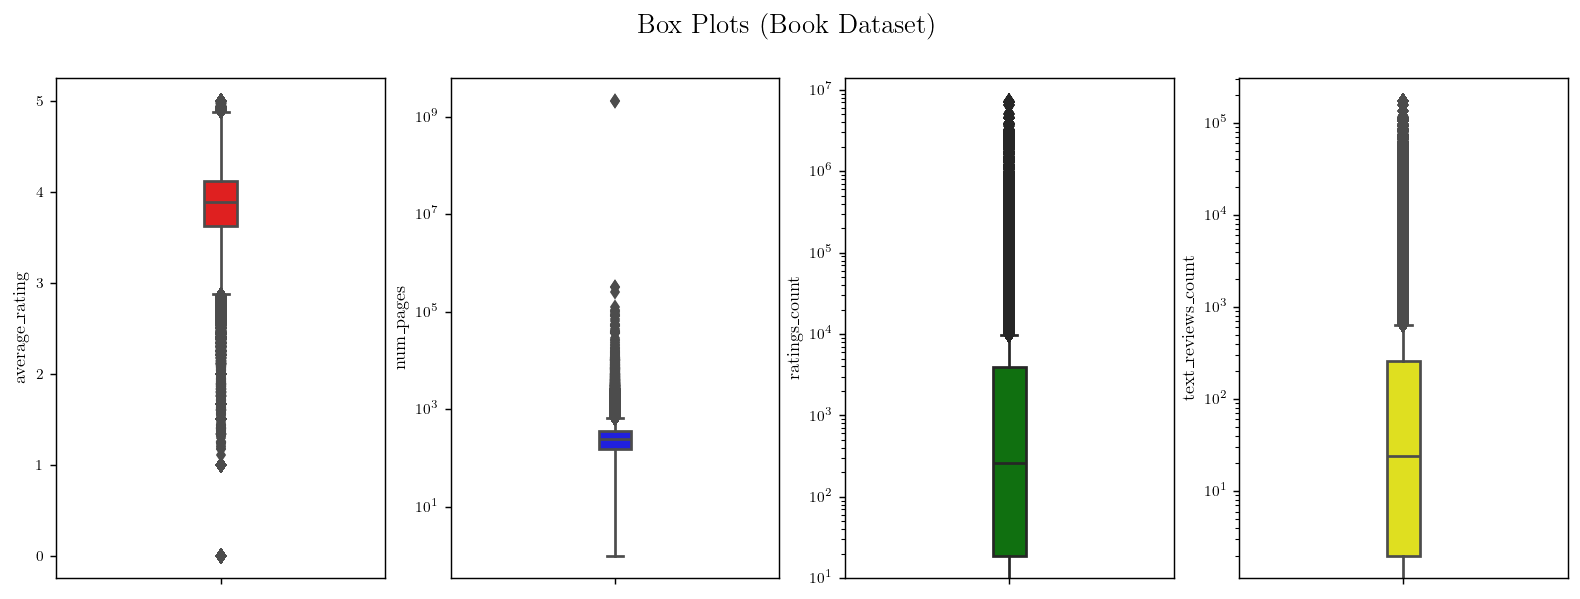

In [22]:
#Here we create the figure and the axes of the plot. They are 4 because we want to plot 4 boxplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, dpi = 130, figsize=(15,5))
#Here we set the title of the plot
fig.suptitle('Box Plots (Book Dataset)')
#Here we plot the boxplots
pm.box_plot(data=lighter_books, y="average_rating", color="red", ax=ax1)
pm.box_plot(data=lighter_books, y="num_pages", color="blue", ax=ax2)
pm.box_plot(data=lighter_books, y="ratings_count", color="green", ax=ax3)
pm.box_plot(data=lighter_books, y="text_reviews_count", color="yellow", ax=ax4)
#Here we set the yscale of the last 3 plots to log since the spread of the data is very big
ax2.set_yscale("log")
ax3.set_yscale("log")
ax4.set_yscale("log")


As we can see from the box plots, every (numerical) column on the ``lighter_books`` dataset presents *outliers* (i.e. values outside the upper or lower quartiles of the data). We can make the following observations:

- For the ``average_rating`` column, we can see that the Interquartile Range (IQR) ranges from around $3.6$ to $4.12$ (we know these values by looking at the describe method above) meaning that $50\%$ of the total books of our dataset have an average rating within these values. On the other side, we can see that the outliers of this column are **below** the first quartile, meaning that low ratings (below $3.6$) are considered as outliers of this dataset.

- For the ``num_pages`` column we can see that Interquartile Range (IQR) is relatively small since it ranges from around $156$ to $360$ pages (we know these values by looking at the describe method above) meaning that $50\%$ of the total books of our dataset have numbers of pages within these values. Nevertheless as we can see, we have clearly outliers with an enormous quantity of pages.

- For the ``ratings_count`` and ``text_reviews_count`` columns we already knew beforehand that their values are very spread and it shows on the plot, since the size of the IQR is big. We can also observe the same behaviour for the outliers as before, this is natural since in general there are books that generate a lot of reviews and those that don't.

Finally, to conclude our EDA for the ``lighter_books`` dataset, we can construct a correlation matrix of the numeric values of the dataset in order to observe if there are some columns that are correlated with each other. To do this, we can use the built-in ``.corr()``method for Pandas DataFrames:

In [23]:
#Here we obtain the correlation matrix of the books dataset
lighter_books.corr(numeric_only=True)


,author_id,average_rating,ratings_count,text_reviews_count,num_pages
author_id,1.000000,-0.072617,-0.072911,-0.077655,-0.000449
average_rating,-0.072617,1.000000,0.063835,0.073901,-0.000381
ratings_count,-0.072911,0.063835,1.000000,0.895199,-0.000176
text_reviews_count,-0.077655,0.073901,0.895199,1.000000,-0.000224
num_pages,-0.000449,-0.000381,-0.000176,-0.000224,1.000000


Using this method we can observe the (Pearson) correlation between the columns of the ``lighter_books`` dataset. These values are generally low for almost every column of the dataset but we can see, for example, that the ``ratings_count`` and ``text_reviews_count`` present a high (positive) correlation value. This is expected since it is probable that when rating a book, a user also wrote a text review about it.

In order to have a more general view of this correlation matrix we can use a Heat Map to plot it and see if other columns are correlated to each other:

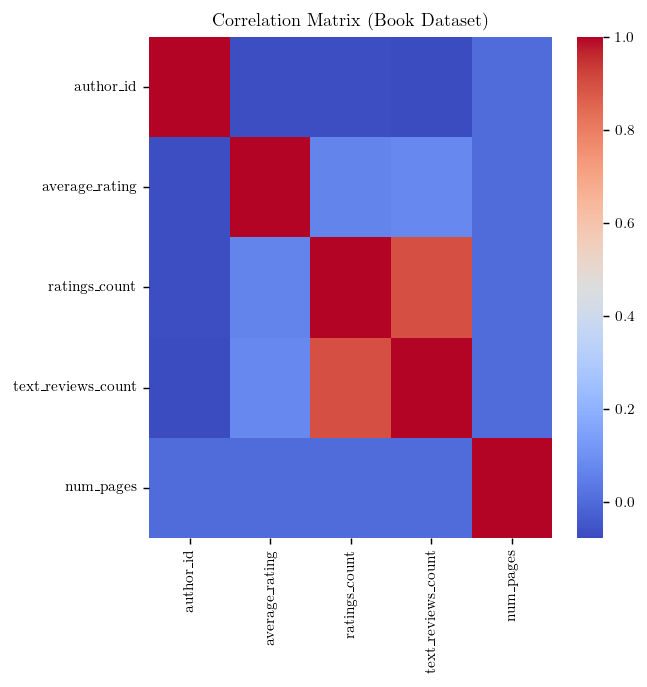

In [24]:
#Here we create the figure and the axes of the plot
plt.figure(figsize=(5,5), dpi= 130)
#Here we set the title of the plot
plt.title("Correlation Matrix (Book Dataset)")
#Here we plot the correlation matrix
pm.heat_map(lighter_books.corr(numeric_only=True), cmap = 'coolwarm')


As we can see, only the ``ratings_count`` and ``text_reviews_count`` present a significant correlation value.

#### **The Authors Dataset**

Now, we can continue our EDA by analyzing the ``lighter_authors`` dataset in the same way as we did before. First, we can print the shape and the first elements of this dataset:

In [25]:
#Here we print the shape of the authors dataset
print(lighter_authors.shape)
#Here we print its head
lighter_authors.head()


(248361, 9)


,ratings_count,average_rating,text_reviews_count,book_ids,works_count,name,gender,about,fans_count
id,,,,,,,,,
4,2862064,4.19,62681,"[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,Douglas Adams,male,"Douglas Noël Adams was an English author, comi...",19826
7,1417316,4.02,84176,"[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,Bill Bryson,male,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
10,56159,4.53,352,"[349254, 15222, 14833682, 15221, 18126815, 152...",14,Jude Fisher,female,"Jude Fisher is the pseudonym for <a href=""http...",60
12,3302,3.79,480,"[40, 9416484, 12482, 3753106, 26889789, 104764...",45,James Hamilton-Paterson,male,James Hamilton-Paterson's work has been transl...,72
14,7979,3.60,772,"[8466327, 15739968, 22756778, 51026133, 260451...",61,Mark Watson,male,Mark Andrew Watson (born 13 February 1980) is ...,179


As we can see we remained with **9** columns (notice that we made the original ``id`` column into an index) of the original **12** we had initially and with a total of **248361** authors in our database. It is important to know which of the columns of our database have empty values (in our case ``NaN`` since when we uploaded the data we substituted the empty values with ``NaN``), we can observe this with the following command:

In [26]:
#Here we search in every column for NaN values
lighter_authors.isna().any()


ratings_count         False
average_rating        False
text_reviews_count    False
book_ids              False
works_count           False
name                  False
gender                False
about                 False
fans_count            False
dtype: bool

Good news! We can see that there is no column with ``NaN`` values. It would be interesting to see if we're correct about ``gender`` column by thinking all gender should be categorized. Out of curiosity, we can do this using the ``.value_counts()`` method:

In [27]:
#Here we obtain the counts for every type of gender value
lighter_authors["gender"].value_counts()


gender
male                138160
female              109868
non-binary              48
genderqueer             28
Nonbinary               21
                     ...  
Unsolved                 1
Husband and Wife         1
AMAB                     1
Master                   1
Tomboy                   1
Name: count, Length: 149, dtype: int64

As we can see, our assumption was right, genders other than male and female are considered within the dataset, so it is probable that the ``NaN`` values were made for fake authors. It is important to notice that, for example, "Non Binary" gender appears more than once written differently so it's recognized as different, this would suggest that our dataset had categorization issues when it was created.

 For the next step we can look at the information of the ``lighter_authors`` dataset to see which are the datatypes of every column and see if they're useful for our analysis going forward or if we need to make some more changes:

In [28]:
#Here we print the info of the books dataset
lighter_authors.info()


<class 'pandas.core.frame.DataFrame'>
Index: 248361 entries, 4 to 16777091
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       248361 non-null  int32  
 1   average_rating      248361 non-null  float32
 2   text_reviews_count  248361 non-null  int32  
 3   book_ids            248361 non-null  object 
 4   works_count         248361 non-null  int32  
 5   name                248361 non-null  object 
 6   gender              248361 non-null  object 
 7   about               248361 non-null  object 
 8   fans_count          248361 non-null  int32  
dtypes: float32(1), int32(4), object(4)
memory usage: 13.3+ MB


Everything looks great! The data type of every column is as it should be when we first defined it. Now, after observing the types of our columns, we can extract useful statistical measures from within the dataset. To do this, we can use Pandas built-in ``describe()`` method:

In [29]:
#Here we can print statistics about the authors dataset
lighter_authors.describe()


,ratings_count,average_rating,text_reviews_count,works_count,fans_count
count,2.483610e+05,248361.000000,248361.000000,248361.000000,248361.000000
mean,5.863818e+03,3.710501,393.701121,20.693744,133.366273
std,1.129004e+05,1.107792,4305.507349,532.356422,2844.734880
min,0.000000e+00,0.000000,0.000000,1.000000,0.000000
25%,8.000000e+00,3.630000,2.000000,2.000000,1.000000
50%,5.200000e+01,3.950000,11.000000,6.000000,5.000000
75%,4.100000e+02,4.240000,67.000000,16.000000,26.000000
max,2.700375e+07,5.000000,608956.000000,186086.000000,766035.000000


As we've seen, statistics from the ``id``'s columns are useless since these are numbers given to identify rows. Nevertheless, for the other columns we see that:

- The values in the ``average_rating`` column go from $0$ to $5$, consistent with the Books dataset. At the same time, we can see that the average rating for all the authors in our dataset is $\sim 3.7$ with a standard deviation of $\sigma \sim 1.1$.

- For the ``fans_count`` column we can observe that the mean is $\sim 133$ and a standard deviation of $\sigma \sim 2844$, a very high value, which means that the number of fans varies a lot within our dataset. The same is true for the ``works_count`` , ``ratings_count`` and  ``text_reviews_count`` columns.

To observe better this data we can make a convenient Box Plot that could give us more insight about the characteristics of the (numeric) data of this dataset and also help us observe if there are any outliers within this data:

Once we've done this we can visualize the statistics of our dataset via a Box Plot:

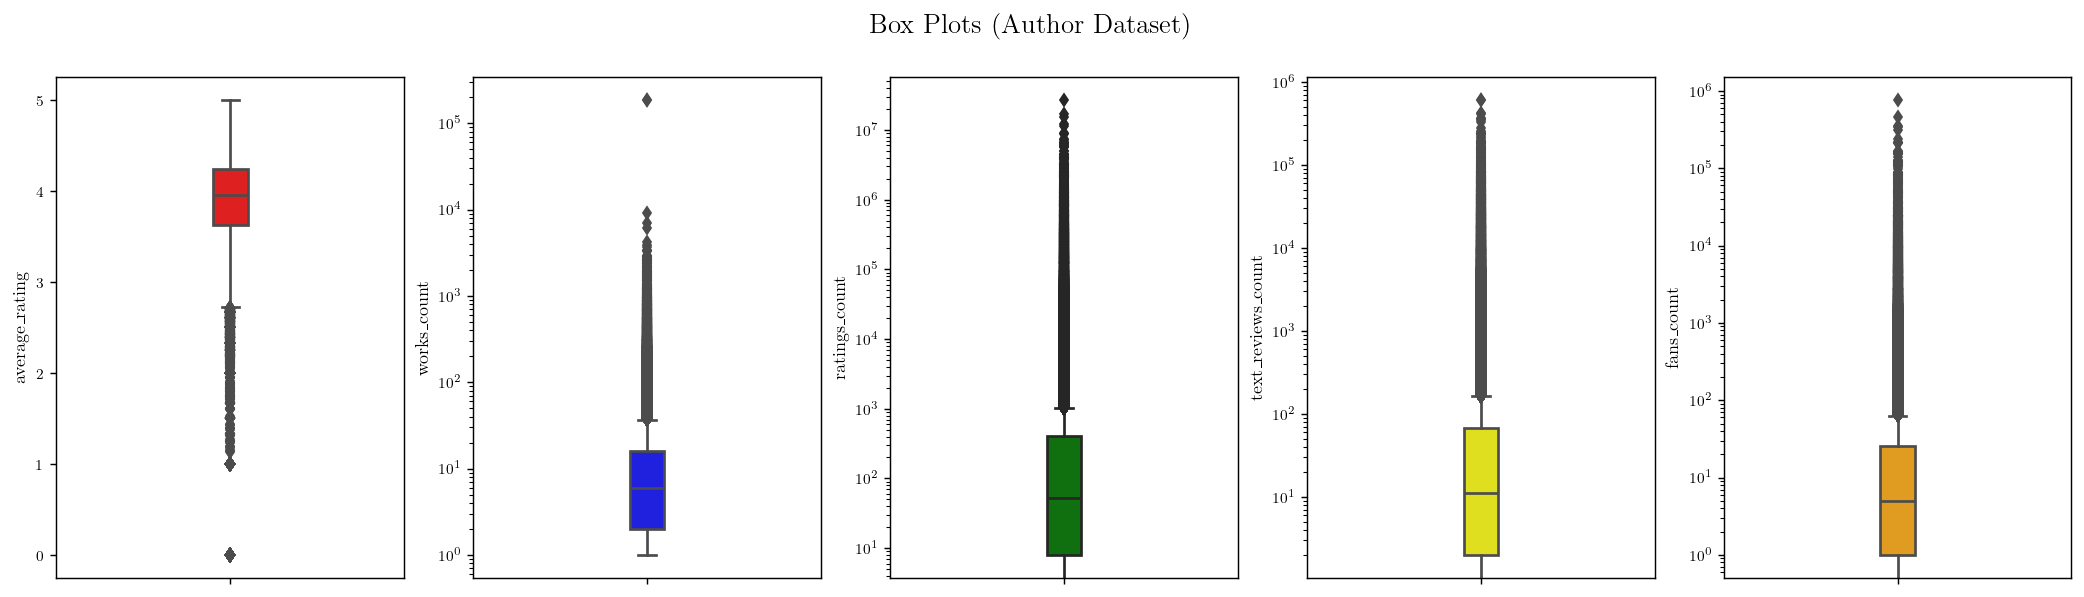

In [30]:
#Here we create the figure and the axes of the plot. They are 4 because we want to plot 4 boxplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, dpi = 130, figsize=(20,5))
#Here we set the title of the plot
fig.suptitle('Box Plots (Author Dataset)')
#Here we plot the boxplots
pm.box_plot(data=lighter_authors, y="average_rating", color="red", ax=ax1)
pm.box_plot(data=lighter_authors, y="works_count", color="blue", ax=ax2)
pm.box_plot(data=lighter_authors, y="ratings_count", color="green", ax=ax3)
pm.box_plot(data=lighter_authors, y="text_reviews_count", color="yellow", ax=ax4)
pm.box_plot(data=lighter_authors, y="fans_count", color="orange", ax=ax5)
#Here we set the yscale of the last 4 plots to log since the spread of the data is very big
ax2.set_yscale("log")
ax3.set_yscale("log")
ax4.set_yscale("log")
ax5.set_yscale("log")



As we can see from the box plots, every (numerical) column on the ``lighter_authors`` dataset presents *outliers* (i.e. values outside the upper or lower quartiles of the data). We can make the following observations:

- For the ``average_rating`` column, we can see that the Interquartile Range (IQR) ranges from around $3.6$ or $4.25$ (we know these values by looking at the describe method above) meaning that $50\%$ of the total authors of our dataset have an average rating within these values. On the other side, we can see that the outliers of this column are **below** the first quartile, meaning that low ratings (below $3.6$) are considered as outliers of this column value.

- For the ``works_count`` column we can see that the Interquartile Range (IQR) ranges from around $2$ to $16$ books per author meaning that $50\%$ of the total authors of our dataset have published around this quantity of books during their life. Nevertheless, we can observe there are clearly outliers with authors publishing up to $186086$ books!

- For the ``fans_count`` column we can see that the Interquartile Range (IQR) ranges from around $1$ to $26$ fans per author meaning that $50\%$ of the total authors of our dataset have this number of fans. Nevertheless as we should expect, there are outliers with enormous number of fans (probably big saga writers) and with little number of fans (maybe they are not very known).

- For the ``ratings_count`` and ``text_reviews_count`` columns we can observe mostly the same behaviour as in the last dataset, since there are authors that generate more reviews (as they are popular or controversial, etc.) and those who don't.

Finally, to conclude our EDA for the ``lighter_authors`` dataset, we can visualize a correlation matrix of the numeric values of the dataset in order to observe if there are some columns that are correlated with each other. To do this, we can use the built-in ``.corr()``method for Pandas DataFrames:

,ratings_count,average_rating,text_reviews_count,works_count,fans_count
ratings_count,1.000000,0.015075,0.870784,0.028707,0.610518
average_rating,0.015075,1.000000,0.023800,0.004664,0.012757
text_reviews_count,0.870784,0.023800,1.000000,0.029008,0.736057
works_count,0.028707,0.004664,0.029008,1.000000,0.014928
fans_count,0.610518,0.012757,0.736057,0.014928,1.000000


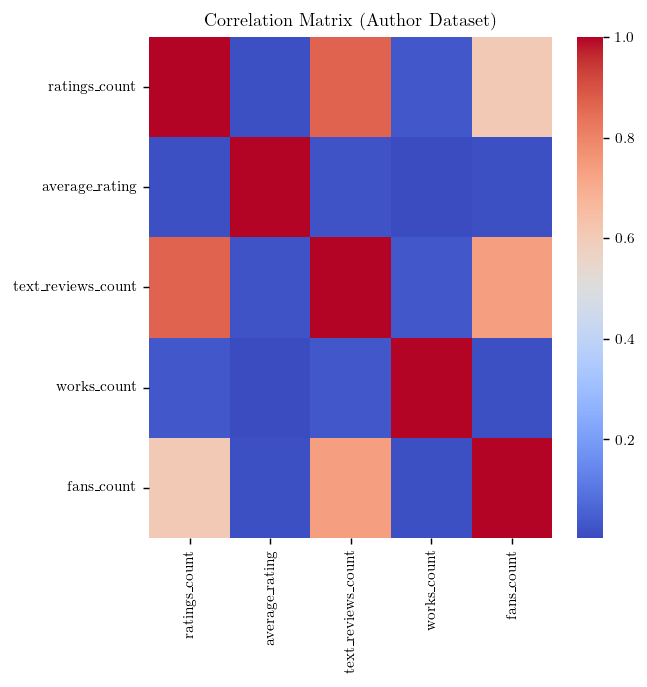

In [31]:
#Here we create the figure and the axes of the plot
plt.figure(figsize=(5,5), dpi= 130)
#Here we set the title of the plot
plt.title("Correlation Matrix (Author Dataset)")
#Here we plot the correlation matrix
pm.heat_map(lighter_authors.corr(numeric_only=True), cmap = 'coolwarm')

#Here we print the values of the correlation matrix
lighter_authors.corr(numeric_only=True)


As in the ``books`` dataset, we can see that the ``ratings_count`` and ``text_reviews_count`` columns are highly correlated since it is probable that when rating a book, a user also wrote a text review about it. Interestingly, these columns are also correlated with the ``fans_count`` column, which makes absolute sense, since it would be expected that an author with a big number of fans would receive a big number of ratings/reviews and viceversa.

----

### **[RQ2] Let’s finally dig into this vast dataset, retrieving some vital information:** 

- Plot the number of books for each author in descending order.

- Which book has the highest number of reviews?

- Which are the top ten and ten worst books concerning the average score?

- Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

- How many books have more than 250 pages?
    
- Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).

----

As our first task, we need to plot the number of books for each author in descending order. As we've seen, this is a huge dataset with 351700 different authors (in the ``lighter_authors`` dataset), therefore it would not be visually significant to plot the number of books for **all** the authors. 

In order to make this plot we will just consider the top 50 authors with most number of books, but we'll use a general function that can obtain the number of books in descending order for the number of authors you like. This function is called: ``sort_dataset_by_column`` and its included in the ``data_handling.py`` module. We can make the plot as:

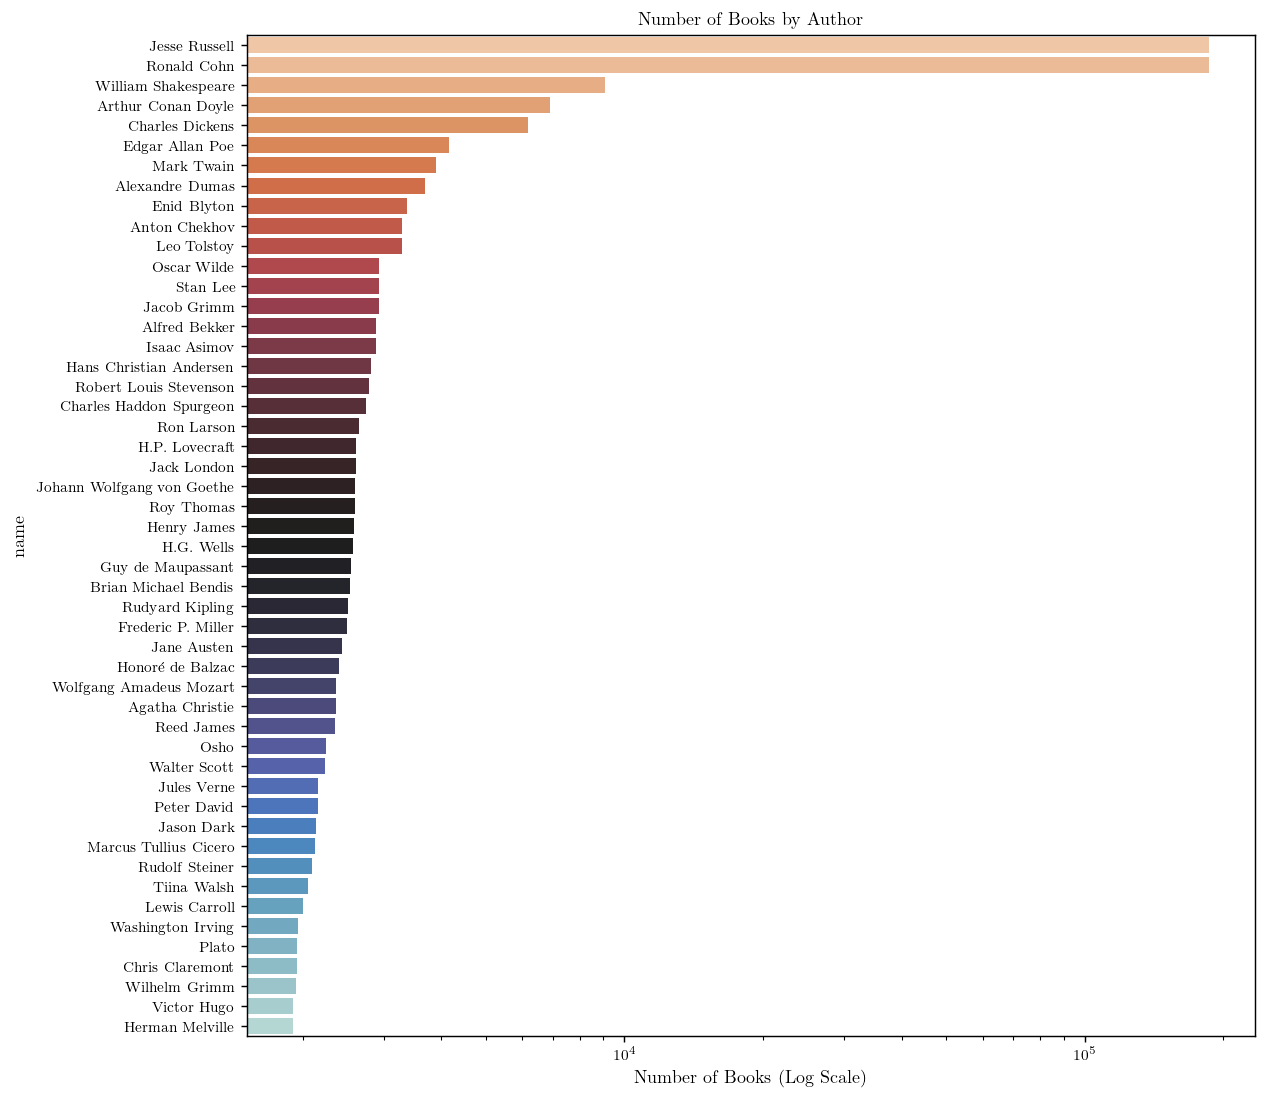

In [32]:
#Here we create the figure and the axes of the plot
plt.figure(figsize=(10,10), dpi= 130)
#Here we set the title of the plot
plt.title("Number of Books by Author")
#Here we plot the distribution of the number of books by author
pm.bar_plot(data=dm.sort_dataset_by_column(dataset = lighter_authors, column_name= "works_count", number_of_rows=50), x="works_count", y="name", palette = 'icefire_r')
#Here we set the xscale of the plot to log since the number of books by author is very big. We also set the xlabel
plt.xlabel("Number of Books (Log Scale)")
plt.xscale("log")


Everything looks great so far. We can observe that Jesse Russell is the author with most number of books on this dataset. According to [Wikipedia](https://en.wikipedia.org/wiki/Jesse_Russell), Russell was an inventor, so we could assume many (or all) of these books are patents or something similar. 

Now, as a next step, we can see which book has the highest number of reviews, we can still use the ``sort_dataset_by_column`` function:


In [33]:
#Here we search for the book with the highest number of text reviews. To do this we first sort the dataset by the text_reviews_count column and then we take the first row of the dataset using the iloc function
top_book = dm.sort_dataset_by_column(dataset = lighter_books, column_name= "text_reviews_count", number_of_rows=1)
#Here we print the title of the book with the highest number of text reviews
print(f"The book with the highest number of text reviews is: {top_book.iloc[0]['title']}")


The book with the highest number of text reviews is: Arena smrti (Igre lakote #1)


Surprisingly this is the Hunger Games in Slovenian. We can also obtain the top 10 best books by ``average_rating`` using the same function:

In [34]:
#Here we search for the top 10 books with best average rating by sorting the books dataset by the average_rating column and then taking the first 10 rows of the dataset. Then we take the title column of the dataset and convert it to a list
top_10_best_books = dm.sort_dataset_by_column(dataset = lighter_books, column_name= "average_rating", number_of_rows=10)["title"].tolist()
#Here we print the top 10 books with best average rating
print("The 10 best books by average rating are:")
#We do this by looping through the list and printing the title of each book
for i in range(10):
    print(f"{i+1}. {top_10_best_books[i]}")


The 10 best books by average rating are:
1. Kuidas sünnib näitemäng. Kuidas tehakse filmi
2. Á Íslendingaslóðum í Kaupmannahöfn
3. A Doutrina do Perfeccionismo de Carlos McCord
4. Israel Defence Forces The Six Day War
5. The Mercy of God in His Works (Volume II)
6. Cancer Country, A Survivor's Memoir
7. Bard in a Box: The Taming of the Shrew
8. Being Conservative from A to Z: An Anthology and Guide  for Busy Conservative-Minded People
9. Waiting on the Spirit of Promise: The Life and Theology of Suffering of Abraham Cheare
10. Janes Tagebuch: Mein altes Leben


We can do the same for the top 10 worst books by ``average_rating``:

In [35]:
#Here we search for the top 10 books with worst average rating by sorting the books dataset by the average_rating column and then taking the first 10 rows of the dataset. Then we take the title column of the dataset and convert it to a list
top_10_worst_books = dm.sort_dataset_by_column(dataset = lighter_books, column_name= "average_rating", number_of_rows=10, ascending=True)["title"].tolist()
#Here we print the top 10 books with worst average rating
print("The 10 worst books by average rating are:")
#We do this by looping through the list and printing the title of each book
for i in range(10):
    print(f"{i+1}. {top_10_worst_books[i]}")


The 10 worst books by average rating are:
1. Christian Adventures
2. Kenya (Thomas Cook Travellers)
3. Quel Beau Cadeau de Noël! (Sami Nounours Magique #1)
4. Believe in the Unbelievable
5. Sally Screw
6. Ukraine's Military Between East and West
7. Russian Military Transformation - Goal In Sight?
8. Legality in Cyberspace: An Adversary View
9. Chief Salt
10. The Blessing of Christmas Surprises


Now, we can visualize the different languages are distributed in our dataset by plotting a pie chart. Since there are $295$ languages on our database, in order to visualize our data better, we decided to plot the top 10 languages (in percentage), where the 10th language is a grouping of all the other languages within the database, labeled as "other". In principle, using our custom function ``count_column_values`` we could plot the pie chart for all the possible languages, but it would be visually impossible to distinguish one from another.

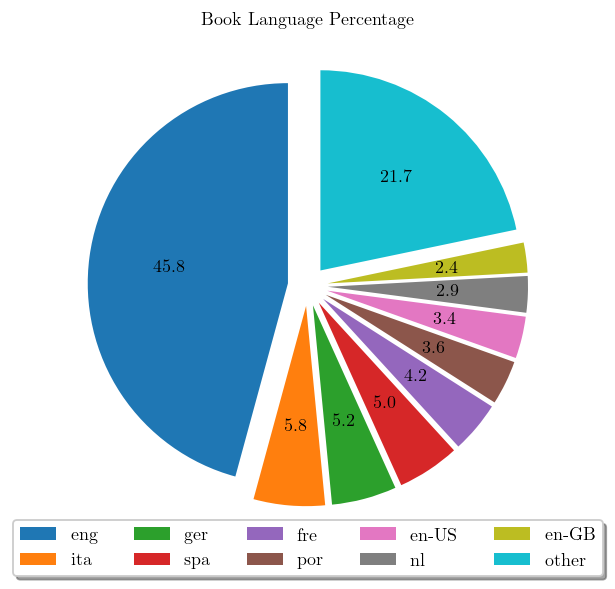

In [36]:
#Here we count the number of books for each language taking as a limit the 9 most common languages. We also give the name "other" to the rest of the languages
languages, values = dm.count_column_values(lighter_books.language, limit = 9, general_name="other")

#Here we plot the pie chart
plt.figure(figsize=(15,5), dpi= 130)
plt.title("Book Language Percentage")
pm.pie_chart(counts_list=values, labels_list=languages)


As we could expect, more than **$45\%$** of the books of our dataset are in English, followed by Italian, German, Spanish and French ($\approx 5\%$ each other). Nevertheless, we can observe that variants of languages are also categorized, for example, we have English, English from the US and English from Great Britain. We could expect other languages to have variants as well, like the case of Spanish or Portuguese.

We can also easily obtain how many books have more than $250$ pages:

In [37]:
#Here we count the number of books with more than 250 pages. We do this by taking the number of rows of the dataset that have more than 250 pages
print(f"{len(lighter_books[lighter_books.num_pages >250])} books have more than 250 pages.")


793523 books have more than 250 pages.


Finally, we can plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books):

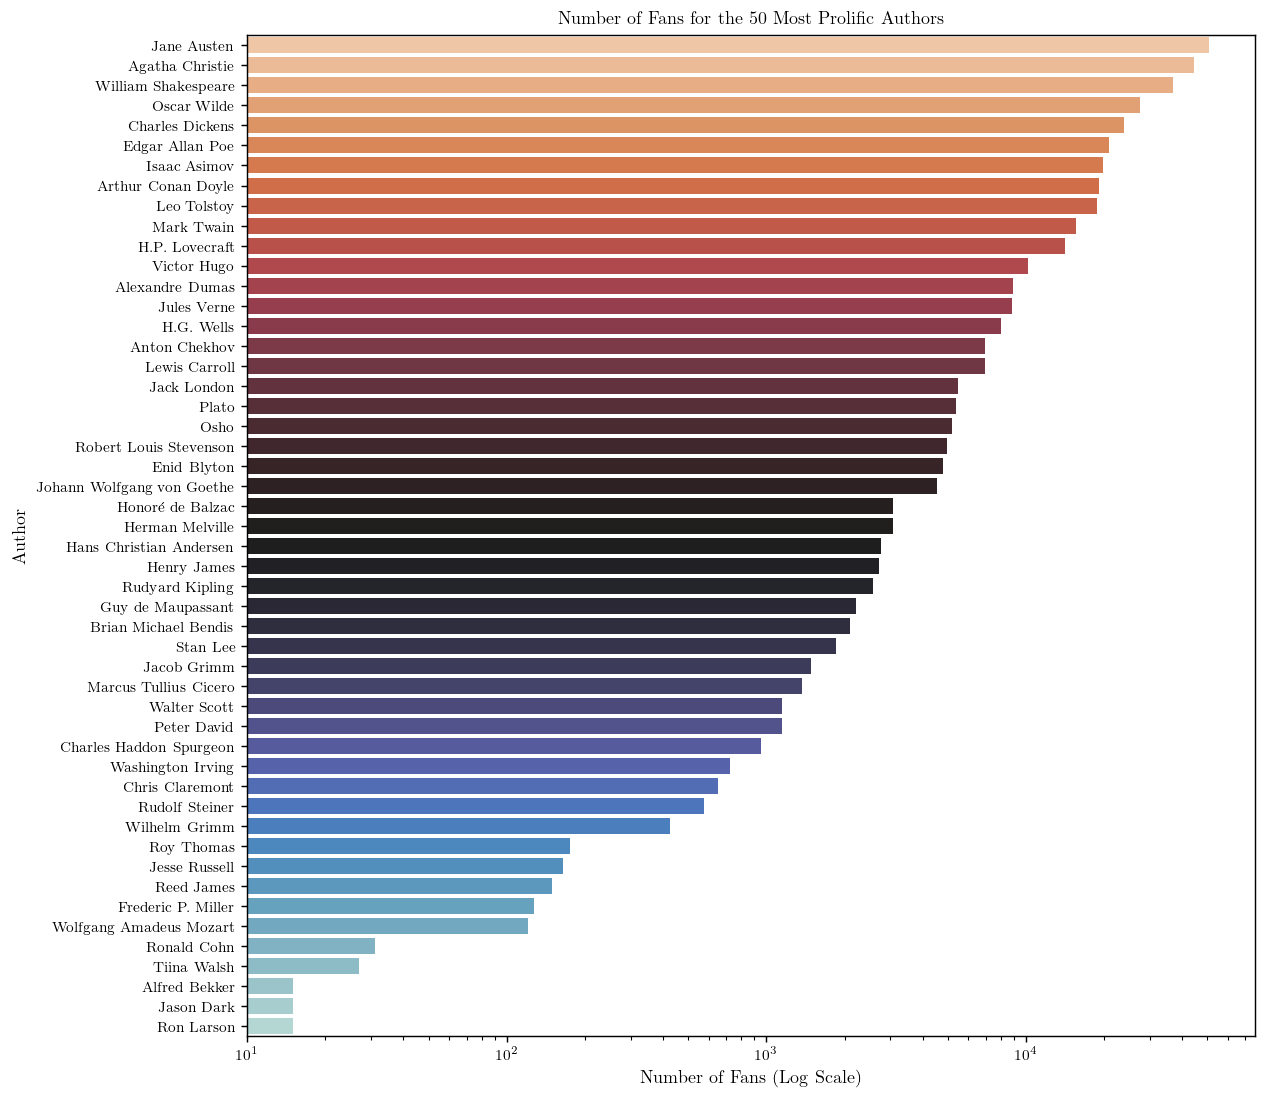

In [38]:
#First we sort the authors dataset by the number of works_count column in descending order and then we take the first 50 rows of the dataset
#Then we sort the dataset by the fans_count column in descending order in order to obtain the 50 most prolific authors in descending order of number of fans
most_prolific_authors = dm.sort_dataset_by_column(dataset = lighter_authors, column_name= "works_count", number_of_rows=50).sort_values(by="fans_count", ascending=False)

#Here we create the figure and the axes of the plot
plt.figure(figsize=(10,10), dpi= 130)
#Here we set the title of the plot
plt.title("Number of Fans for the 50 Most Prolific Authors")
#Here we plot the distribution of the number of fans for the 50 most prolific authors. We sort the most_prolific_authors dataset by the fans_count column in descending order and then we plot it.
pm.bar_plot(data=most_prolific_authors, x="fans_count", y="name", palette = 'icefire_r')
plt.ylabel("Author")
plt.xlabel("Number of Fans (Log Scale)")
plt.xscale("log")


We can see, for example, that the top 10 of the most prolific authors regarding number of fans are: Jane Austen, Agatha Cristie, William Shakespeare, Oscar Wilde, Charles Dickens, Edgar Allan Poe, Isaac Asimov, Arthur Conan Doyle, Leo Tolstoy and Mark Twain, all historic authors!

----

### **[RQ3] Let’s have a historical look at the dataset!** 

- Write a function that takes as input a year and returns as output the following information:

   - The number of books published that year.
   
   - The total number of pages written that year.
   
   - The most prolific month of that year.
   
   - The longest book written that year.
   
- Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.
   
- Ask **ChatGPT** or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it. 

----

Before writing a function that takes as input a year and outputs historical information about our dataset it is important to notice that the ``original_publication_date`` contains strings that can fall within the next categories:

- String in format "YYYY-MM-DD"
- String in format "YYYY-MM"
- String in format "YYYY"

In order to work with dates it would be best to convert this column to ``datetime`` type. Nevertheless we can't do this since datetimes have time [limitations](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-timestamp-limits) and we have dates that fall out of this limitations, therefore it would be better to convert our dates into [Pandas Periods](https://pandas.pydata.org/docs/reference/api/pandas.Period.html) (we found the inspiration for the solution at this [link](https://stackoverflow.com/questions/58659851/how-to-move-the-timestamp-bounds-for-datetime-in-pandas-working-with-historical)).

The Pandas Periods data type allows us to convert date-like strings to objects that we can manipulate and obtain values from, like month, year or day. The advantage of this type is that it can convert the dates even if they're incomplete like in our case. When the dates are incomplete the Pandas Periods assumes that:

- If the string is in format "YYYY-MM" it assumes that you refer to "YYYY-MM-31" (or to 30, 29 or 28 depending on the month and year).
- If the string is in format "YYYY" it assumes that you refer to "YYYY-12-31".

Thus giving us a way to standardize all of our dates. With this, we could convert the ``original_publication_date`` column to ``period[D]`` type using a custom function called ``standardize_time_column_to_period``:

In [39]:
#Here we convert the original publication_date column of the books dataset to period format
lighter_books = dm.standardize_time_column_to_period(lighter_books, "original_publication_date")


After doing this, we can write a function that takes as input a year and outputs historical information about our dataset by treating the values of the ``original_publication_date`` column as ``datetime`` objects. The function we wrote is called ``historical_data`` and its contained on our ``data_handling.py`` module (see the file to read the definition).

We can test our function by obtaining historical data for the year 2018:


In [49]:
#Here we obtain all the historical data from 2018 and print it as a dataframe
dm.historical_data(lighter_books, "original_publication_date", 2018)


,Year,Total Number of Books,Total Number of Pages,Most Prolific Month,Longest Book
0,2018,154,58755,1,La saga di Terramare


We can see that in this year, there were $154$ books, with $58755	$ total number of pages, the most prolific month was $1$ (January) and the title of the longest book is "La saga di Terramare".

Now, we can use this function to build a dataframe with the historical data for all the years included in our dataset. To do this, we built another function called ``historical_dataframe`` included in our ``data_handling_module``:

In [50]:
#Here we create a dataframe with the historical data of the books dataset
historical_books_df = dm.historical_dataframe(lighter_books, "original_publication_date")


We can show the head of this dataframe:

In [51]:
#Here we can show the first 10 rows of the historical_books_llm dataframe
historical_books_df.head(10)


,Total Number of Books,Total Number of Pages,Most Prolific Month,Longest Book
Year,,,,
1448,1,117,1,Songs of Kabir
1450,19,4743,1,Les Cent Nouvelles Nouvelles
1452,1,468,1,Da arte de construir
1453,2,446,1,O miru među religijama: De pace fidei
1454,4,1314,1,As crónicas de Fernão Lopes
1456,5,1961,1,Jehan de Saintré
1458,1,26,1,Heidelberger Totentanz
1459,14,3466,1,De volledige Villon
1460,8,811,1,دلائل الخيرات


And we can see the indexes are not continous since the database doesn't have books for all the years (specially the ones before the modern era). Now, we can see the tail of this dataframe:

In [58]:
#Here we can show the last 10 rows of the historical_books_df dataframe
historical_books_df.tail()


,Total Number of Books,Total Number of Pages,Most Prolific Month,Longest Book
Year,,,,
2017,368,118193,1,The Starfarers Quartet
2018,154,58755,1,La saga di Terramare
2019,105,33029,1,Hopeless / Losing Hope / Finding Cinderella
2020,72,24032,9,"The Complete Ripley Novels (Ripley, #1-5)"
2021,16,7944,8,The Navigator's Children (The Last King of Ost...


As a next step, we can ask **ChatGPT** to build the ``historical_data`` and ``historical_dataframe`` functions for us in order to test its correctness and similarity with the code we wrote. The prompt to build the ``historical_data`` function was the following:

> You are a Data Scientist. You have a books dataset contained in a Pandas Dataframe including the following columns among others:
> - "original_publication_date" that includes dates of publication with dtype period[D].
> - "num_pages" that includes as values the number of pages for each book in the dataset.
> - "title" that includes as values the title for each book in the dataset.
> 
>Write a function in Python that takes as an input a year and and returns as output the following information:
>- "Total Number of Books" (int64): The number of books published that year.
>- "Total Number of Pages" (int64): The total number of pages written that year.
>- "Most Prolific Month" (int64): The most prolific month of that year.
>- "Longest Book" (object): The longest book written that year.

We got the following response:

> To achieve this task, you can create a Python function that takes a year as input, filters the DataFrame for books published in that year, and then calculates the requested information. Here's a sample function that accomplishes this:
> ```python
>import pandas as pd
>
>def get_yearly_stats(books_df, year):
>    # Filter books published in the specified year
>    year_filter = books_df['original_publication_date'].dt.year == year
>    books_in_year = books_df[year_filter]
>
>    if books_in_year.empty:
>        return {
>            "Total Number of Books": 0,
>            "Total Number of Pages": 0,
>            "Most Prolific Month": None,
>            "Longest Book": None
>        }
>
>    # Calculate the total number of books published in the year
>    total_books = len(books_in_year)
>
>    # Calculate the total number of pages written in the year
>    total_pages = books_in_year['num_pages'].sum()
>
>    # Extract the month and year from the publication date
>    books_in_year['month'] = books_in_year['original_publication_date'].dt.month
>
>    # Find the most prolific month in terms of book publications
>    most_prolific_month = books_in_year['month'].value_counts().idxmax()
>
>    # Find the longest book written in the year
>    longest_book = books_in_year.loc[books_in_year['num_pages'].idxmax()]['title']
>
>    return {
>        "Total Number of Books": total_books,
>        "Total Number of Pages": total_pages,
>        "Most Prolific Month": most_prolific_month,
>        "Longest Book": longest_book
>    }
>
># Example usage:
># Assuming you have a Pandas DataFrame named 'books_df' containing your book data
># and 'original_publication_date' is of dtype 'period[D]'
>year = 2023  # Specify the year you are interested in
>yearly_stats = get_yearly_stats(books_df, year)
>print(yearly_stats)
>
> ```
>Make sure to adjust the column names and data types in the function if they differ in your actual DataFrame. This function first filters the books published in the specified year, calculates the total number of books and pages, finds the most prolific month, and identifies the longest book for that year.

If we compare this function with our own interpretation we can see the following facts:

- The ``get_yearly_stats`` function takes a dataframe and a year as inputs, assuming the dataset has the ``original_publication_date`` column as a given.
- The ``books_in_year`` is obtained in the same way as we implemented on our own function but doing two steps instead of one. The same applies for the ``total_books`` and ``total_pages`` values.
- The ``most_prolific_month`` and ``longest_book`` values are obtained by adding a "Month" column to the ``books_in_year`` DataFrame. The ``most_prolific_month`` value then is calculated in the same way as we implemented but the ``longest_book`` value is calculated in a more elegant way by locating the id of the book with maximum number of pages (for a given month) and extracting its title.
- We can also see that the LLM returned a dictionary instead of a DataFrame like we did.

We can test this function with the same value we tested ours:

In [63]:
#Here we obtain all the historical data from 2018 and print it as a dataframe
print(dm.get_yearly_stats(lighter_books, 2018))


{'Total Number of Books': 154, 'Total Number of Pages': 58755.0, 'Most Prolific Month': 1, 'Longest Book': 'La saga di Terramare'}


We can see that the information is exactly the same as our own function with the exception that the type of "Total Number of Pages" is ``float`` even though we expliciltly stated the type of each value. So far, so good. Now, we can make another prompt to obtain the second part of this task: build a dataframe with all the historical data. The prompt we used was the following:

> Use this function to build a Pandas DataFrame: the index will be a given year (for all the years in the books dataset) and the rows will have as attributes the values of the dictionary you created. Put your code in a function.

We got the following response:

>To create a Pandas DataFrame that contains the yearly statistics for each year in the books dataset, you can use the get_yearly_stats function and apply it to all unique years found in the "original_publication_date" column. Here's a function that does this:
>```python
>import pandas as pd
>
>def get_yearly_stats(books_df, year):
>    # Function code as previously provided
>
>def build_yearly_stats_dataframe(books_df):
>    # Extract unique years from the "original_publication_date" column
>    unique_years = books_df['original_publication_date'].dt.year.unique()
>
>    # Create a list of dictionaries to store yearly statistics
>    yearly_stats_list = []
>
>    # Calculate and populate statistics for each year
>    for year in unique_years:
>        yearly_stats = get_yearly_stats(books_df, year)
>        yearly_stats['Year'] = year
>        yearly_stats_list.append(yearly_stats)
>
>    # Convert the list of dictionaries to a DataFrame
>    yearly_stats_df = pd.DataFrame(yearly_stats_list)
>    yearly_stats_df.set_index('Year', inplace=True)
>
>    return yearly_stats_df
>
># Example usage:
># Assuming you have a Pandas DataFrame named 'books_df' containing your book data
># and 'original_publication_date' is of dtype 'period[D]'
>yearly_stats_dataframe = build_yearly_stats_dataframe(books_df)
>print(yearly_stats_dataframe)
>
>```
>This code will create a Pandas DataFrame with the unique years from the "original_publication_date" column as the index and the statistics for each year as columns.

We can see from this function the following facts in comparison with our implementation:

- The ``unique_years`` are obtained in the same way as we did (without sorting them), by taking the unique values for the years of publication of all the books.
- The ``yearly_stats_df`` is created by populating it with a list of dictionaries instead of concatenating DataFrames as we did before.
- In essence the process is almost the same with a little extra steps like adding the "Year" value to its dictionaries and appending to a list.

Now, let's create the DataFrame in order to prove if it is correct or not:

In [74]:
#Here we create a dataframe with the historical data of the books dataset
historical_books_llm = dm.build_yearly_stats_dataframe(lighter_books)


Now, we can print the (sorted) head of the dataframe:

In [75]:
historical_books_llm.sort_index(inplace=True)

historical_books_llm.head(10)


,Total Number of Books,Total Number of Pages,Most Prolific Month,Longest Book
Year,,,,
1448,1,117.0,1,Songs of Kabir
1450,19,4743.0,1,Les Cent Nouvelles Nouvelles
1452,1,468.0,1,Da arte de construir
1453,2,446.0,1,O miru među religijama: De pace fidei
1454,4,1314.0,1,As crónicas de Fernão Lopes
1456,5,1961.0,1,Jehan de Saintré
1458,1,26.0,1,Heidelberger Totentanz
1459,14,3466.0,1,De volledige Villon
1460,8,811.0,1,دلائل الخيرات


We can see that except for the datatypes (here, the total number of pages are floats), this DataFrame is exactly the same as the one we constructed (at least the first 10 elements). Now, we can print the tail of the DataFrame:

In [77]:
historical_books_llm.tail(10)


,Total Number of Books,Total Number of Pages,Most Prolific Month,Longest Book
Year,,,,
2012,111013,28674469.0,1,Bigler County Romantic Thrillers Anthology
2013,121118,29918929.0,1,The Promise of the Child
2014,95793,23216516.0,1,"A Most Unlikely Countess (To Love a Wildcat, #2)"
2015,31541,8120811.0,1,Revel for the American Nation: A History of th...
2016,1457,474676.0,1,Homestuck
2017,368,118193.0,1,The Starfarers Quartet
2018,154,58755.0,1,La saga di Terramare
2019,105,33029.0,1,Hopeless / Losing Hope / Finding Cinderella
2020,72,24032.0,9,"The Complete Ripley Novels (Ripley, #1-5)"


We can see this is also the same as the last part of our DataFrame. But, are this DataFrames equal? We can explore this by converting the dtype of the "Total Number of Pages" column and asserting their equality:

In [82]:
#Now, we change the dtype of the Total Number of Pages column to int64
historical_books_llm["Total Number of Pages"] = historical_books_llm["Total Number of Pages"].astype("int64")

#Here we check if both dataframes are equal
historical_books_df.equals(historical_books_llm)


True

They are the same! In summary we can conclude that ChatGPT's was correct except for a little "tweak" we had to do in the end by changing the dtype of a column. Nevertheless it was surprisingly accurate and resembled in some aspects our own implementation.

----

### **[RQ4] Quirks questions about consistency** 

In most cases, we will not have a consistent dataset, and the one we are dealing with is no exception. So, let's enhance our analysis.
- You should be sure there are no **eponymous** (different authors who have precisely the same name) in the author's dataset. Is it true?
-  Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.
-  What is the **longest book title** among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?
-  What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.

----

First, it is important to notice that we made sure that there were no **eponymous** in our dataset when cleaning the data by dropping the columns where the names were duplicated, using the following command:

```python
lighter_authors = lighter_authors.drop_duplicates(subset = ["name"])
```

Nevertheless, we can double-check if this is True by checking if the "name" column is unique:

In [87]:
#Here we check if the name column of the authors dataset has only unique values
lighter_authors["name"].is_unique


True

Perfect! Now, we wrote a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written. This function is called ``build_dict_of_books`` and you can see its implementation on the ``data_handling.py`` file. It is defined as:

```python
def build_dict_of_books(books_dataframe: pd.DataFrame, author_ids: list)-> dict:
    """
    Function that returns a dictionary with the book names of the authors in the author_ids list.

    Args:
        books_dataframe (pd.DataFrame): Dataframe with the books dataset.
        author_ids (list): List with the author ids.

    Returns:
        dict_of_books (dict): Dictionary with the book names of the authors in the author_ids list.
    """
    #Here we define a new filtered dataframe containing only books of the authors in the author_ids list
    #We use the isin() function in order to obtain True when the author_id is in the author_ids list and False otherwise
    filtered_books_dataframe = books_dataframe[books_dataframe.author_id.isin(author_ids)]

    #Here we create the dictionary of books using the groupby() function. This function groups the dataframe by the author_id column
    #Then we apply the list() function to the title column of the grouped dataframe in order to get a list of the book names of each author
    #Finally we convert the grouped dataframe to a dictionary using the to_dict() function
    dict_of_books = filtered_books_dataframe.groupby("author_id")["title"].apply(list).to_dict()

    #Here we return the dictionary of books
    return dict_of_books

```

As an example, we can test the function by obtaining all the names of the books J.K. Rowling (id 1077326) has published in our database:

In [107]:
#Here we can print the dictionary of book names published by J.K. Rowling (id = 1077326)
print(dm.build_dict_of_books(lighter_books, author_ids=[1077326]))


{1077326: ['Harry Potter and the Order of the Phoenix (Harry Potter, #5)', "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)", 'Harry Potter and the Chamber of Secrets (Harry Potter, #2)', 'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)', 'Harry Potter and the Goblet of Fire (Harry Potter, #4)', 'Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)', 'Harry Potter Collection (Harry Potter, #1-6)', 'Harry Potter Schoolbooks Box Set: Two Classic Books from the Library of Hogwarts School of Witchcraft and Wizardry', 'Harry Potter and the Half-Blood Prince (Harry Potter, #6)', 'Harry Potter Y La Piedra Filosofal (Harry Potter, #1)', "Harry Potter and the Philosopher's Stone", 'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)', '混血王子的背叛 (哈利波特, #6)', '火盃的考驗 (哈利波特, #4)', 'Harry Potter y el misterio del príncipe (Harry Potter, #6)', 'Harry Potter y la Orden del Fénix (Harry Potter, #5)', 'Harrius Potter et Philosophi Lapis', 'Harry Potter and the Chamber of Se

We can see that there are a lot of titles including the different language versions of the same Harry Potter books.

With the help of this function we can extract the **longest book title** among the books of the top 20 authors regarding their average rating. To do this we have to follow these steps:

1. Extract the id's for the top 20 authors regarding the average rating.
2. Apply the ``build_dict_of_books`` to obtain a list of names of books published by each author.
3. Search for the longest book title among this books.

We can follow these steps using functions from our ``data_handling_module``:

In [120]:
#First, we extract the ids of the top 20 authors regarding the average_rating. To do this we sort the authors dataset by the average_rating column in descending order and then we take the first 20 rows of the dataset. Then we take the id column of the dataset and convert it to a list
top_20_authors = dm.sort_dataset_by_column(lighter_authors, column_name="average_rating", number_of_rows= 20).index.tolist()

#Then, we apply the build_dict_of_books function to the books dataset and the list of ids we created before in order to obtain a dictionary with the book titles of the top 20 authors regarding the average_rating
top_20_authors_books = dm.build_dict_of_books(lighter_books, author_ids=top_20_authors)

#Now, we have to obtain a list with all the names of the authors in the top_20_authors_books dictionary. To do this we do list comprehension
#The meaning of this list is: for every list of titles in the top_20_authors_books dictionary, we take the title and we append it to the list. In the end we obtain a list with all the titles of the top 20 authors
top_20_authors_books_list = [title for title_list in top_20_authors_books.values() for title in title_list]

#Finally we print the maximum among these titles
print(f"The longest book title among the top 20 authors regarding the average rating is: {max(top_20_authors_books_list, key=len)} and its length is: {len(max(top_20_authors_books_list, key=len))} characters.")


The longest book title among the top 20 authors regarding the average rating is: Popito!: (Or, "How Popito Met the Girl from Ipanema, Fell in Love, and Lived Happily Ever After!") and its length is: 98 characters.


Is this the longest book title overall? Let's see!

In [127]:
#Here we extract the title of the top 1 book regarding title length. We can use the dm.sort_dataset_by_column function to sort the books dataset by the title column in descending order and then take the first row of the dataset
#We use a lambda function to sort the dataset by the length of the title column
top_1_book = dm.sort_dataset_by_column(lighter_books, column_name="title", number_of_rows=1, key=lambda x: x.str.len()).title.tolist()[0]

#Finally we print the title of the top 1 book regarding title length
print(f"The longest overall book title is: {top_1_book} and its length is: {len(top_1_book)} characters.")


The longest overall book title is: John Howard's Mitgliedes Der K�nigl. Soc. Der Wissenschaften Nachrichten Von Den Vorz�glichen Krankenh�usern Und Pesth�usern in Europa: Nebst Einigen Beobachtungen �ber Die Pest Und Fortgesetzten Bemerkungen �ber Gef�ngnisse Und Krankenh�user; Aus Dem ... and its length is: 255 characters.


Clearly it isn't. We can also extract the shortest book title overall in the same way:

In [129]:
#Here we extract the title of the top 1 smallest book regarding title length. We can use the dm.sort_dataset_by_column function to sort the books dataset by the title column in ascending order and then take the first row of the dataset
#We use a lambda function to sort the dataset by the length of the title column
top_1_short_book = dm.sort_dataset_by_column(lighter_books, column_name="title", number_of_rows=1, key=lambda x: x.str.len(), ascending=True).title.tolist()[0]

#Finally we print the title of the top 1 smallest book regarding title length
print(f"The shortest overall book title is: {top_1_short_book} and its length is: {len(top_1_short_book)} characters.")


The shortest overall book title is: 鶇 and its length is: 1 characters.


As we can see there is nothing strange with this given that it can be a title in Chinese. It is important to notice that the original dataset had empty titles defined as empty strings, therefore if we hadn't cleaned the data, this would have been the shortest title overall (of length $0$).

----

### **[RQ5] We can consider the authors with the most fans to be influential. Let’s have a deeper look.** 

- Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?
- Have they published any series of books? If any, extract the longest series name among these authors.
- How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it. 
- Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.” You may want to have a look at the following recommended readings:
     
     >- https://bhm.scholasticahq.com/article/38021
     >
     >- https://priyanka-ddit.medium.com/how-to-deal-with-imbalanced-dataset-86de86c49
     >
     >- https://compass.onlinelibrary.wiley.com/doi/10.1111/soc4.12962
    
     You can even ask ChatGPT or any other LLM chatbot tool: try to formulate a prompt that provides helpful information about it. Put that information in your notebook and provide comments on what you found.

----

First, to find the top 10 most influential authors regarding their fan count and number of books, we can sort our dataset by these two categories and take the top 10 authors:

In [136]:
#Here we extract the top 10 authors regarding their fan count and number of works. To do this we sort the authors dataset by the fans_count and works_count columns in descending order and then we take the first 10 rows of the dataset.
top_10_influential_authors = dm.sort_dataset_by_column(lighter_authors, column_name=["fans_count", "works_count"], number_of_rows=10)


Now we can plot these authors as a scatter plot, where the x axis represents the number of books and the y axis represents the number of fans of each of the top 10 authors:

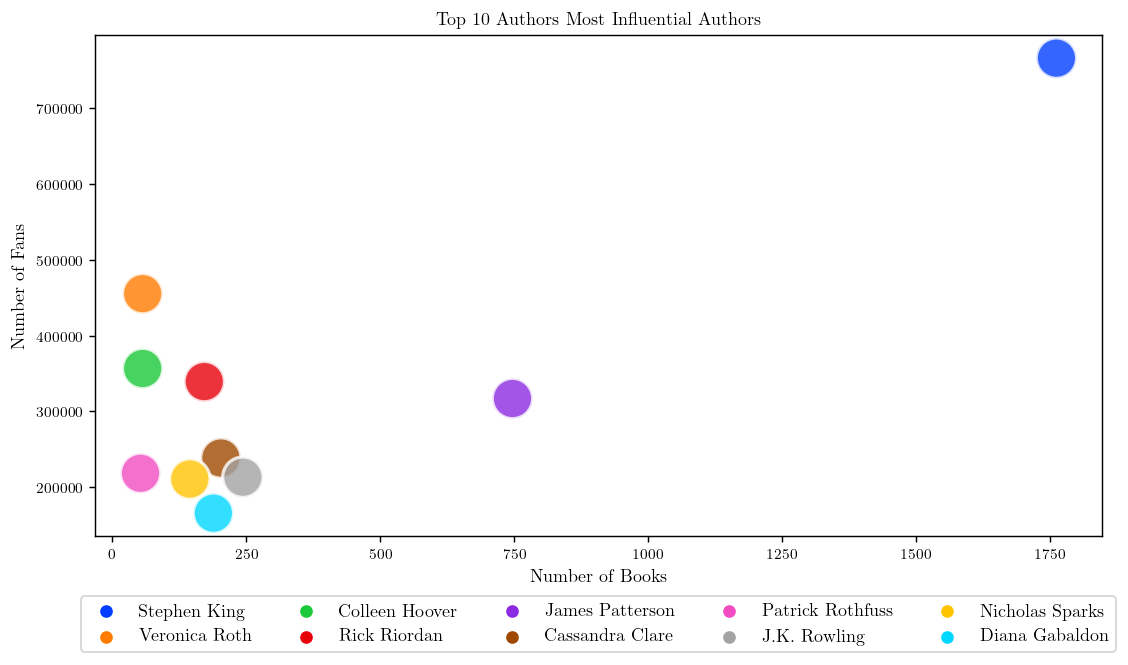

In [219]:
#Here we create the figure and the axes of the plot
plt.figure(figsize=(10,5), dpi= 130)
#Here we set the title of the plot
plt.title("Top 10 Authors Most Influential Authors")
#Here we set the xlabel and ylabel of the plot
plt.xlabel("Number of Books")
plt.ylabel("Number of Fans")
#Here we plot the scatter plot
ax= pm.scatter_plot(data=top_10_influential_authors, x="works_count", y="fans_count", hue="name", palette="bright", alpha=0.8, legend="auto", s=500)
#Here we set the box of the legend outside the plot
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=5)


As we can see (by far) Stephen King is the most influential author regarding number of fans and number of books! It is known that some of these authors have published series of books (J.K. Rowlings's Harry Potter), but we can still see if at least one of them has on our database:

In [310]:
#First we obtain the list of indexes of the top 10 most influential authors
authors_index_list = top_10_influential_authors.index.tolist()

#Now we can filter the books database so it only contains the books of the top 10 most influential authors
top_10_influential_authors_books = lighter_books[lighter_books["author_id"].isin(authors_index_list)]

#Now we can see if the series_position column of the top_10_influential_authors_books dataset has at least one not NaN value
top_10_influential_authors_books["series_position"].notna().any()



True

This means at least one of these authors has published a series of books. Knowing this, we can then extract the name of the longest series of books between all these authors. 

We consider the "longest" series as the series that has **more number of pages in total in the series**. We have to consider that our books dataset can contain multiple entries of the same book series (since language can be different, or even book format), this is why we first have to be sure we're working with a dataset that's unique in these columns. In the same way we have to make sure the numbers in the ``series_position`` column are valid integers since if they aren't we can't consider a series as valid. Doing this we find:

In [356]:
#First we obtain a filtered dataframe with only books that have a series_name value that is not NaN
top_10_influential_authors_series_books = top_10_influential_authors_books[top_10_influential_authors_books["series_name"].notna()]

#Now, we drop rows that are not unique on series_name and series_position since we only want to count the number of series once
top_10_influential_authors_series_books = top_10_influential_authors_series_books.drop_duplicates(subset=["series_name", "series_position"])

#Since the series_position column is an object, we want to make sure we have valid numbers in it. To do this we use a Regex to check if the values are valid sequences of digits
#We use the str.match function to do this. The regex is ^\d+$ and it matches any sequence of digits. We use the na=False argument to ignore NaN values
top_10_influential_authors_series_books = top_10_influential_authors_series_books[top_10_influential_authors_series_books["series_position"].str.match(r"^\d+$", na=False)]

#Now we can convert the series_position column to int32
top_10_influential_authors_series_books["series_position"] = top_10_influential_authors_series_books["series_position"].astype("int32")

#Now we obtain the sum of the num_pages column for each series_name by summing the num_pages column and grouping by the series_name column
longest_series_of_books = top_10_influential_authors_series_books.groupby("series_name")["num_pages"].sum()

#Now we obtain the name of the longest series of books
print(f"The longest series of books of the top 10 most influential authors is: {longest_series_of_books.idxmax()} and it has {int(longest_series_of_books.max())} pages.")


The longest series of books of the top 10 most influential authors is: Alex Cross and it has 8952 pages.


It is Alex Cross! Now, it would be interesting to know how many of these authors have been published in different formats. We can do this by counting the unique formats in which each author has been published and extract the number of authors that have been published in more than one format:

In [233]:
#Here we obtain number of authors that have been published in more than 1 type of format
authors_more_than_1_format = top_10_influential_authors_books.groupby("author_id")["format"].nunique()
#Here we print the number of authors that have been published in more than 1 type of format
print(f"{len(authors_more_than_1_format[authors_more_than_1_format > 1])} authors have been published in more than 1 type of format.")


10 authors have been published in more than 1 type of format.


We can see that every one of the top 10 most influential authors has been published in more than one type of format. What is the distribution of the different formats? Let's plot it!

As the previous case we encountered with the ``language`` distribution of our database, in order to visualize our data better, we decided to plot the top 8 formats (in percentage), where the 8th format is a grouping of all the other formats the top 10 most influential authors were published on, labeled as "other". In principle, using our custom function ``count_column_values`` we could plot the pie chart for all the possible formats, but it would be visually impossible to distinguish one from another.

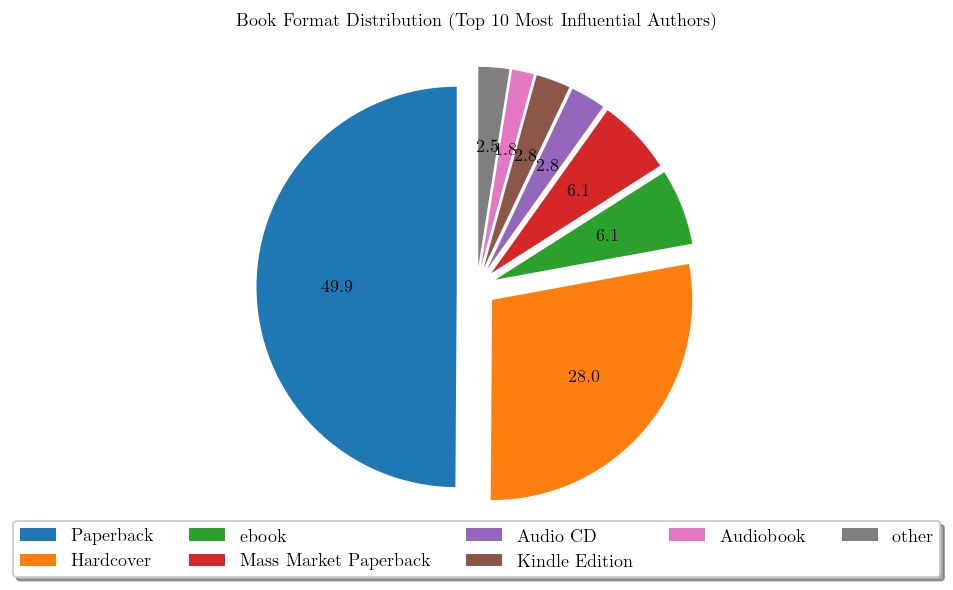

In [272]:
#Here we count the number of books for each format taking as a limit the 7 most common format. We also give the name "other" to the rest of the formats
formats, values = dm.count_column_values(top_10_influential_authors_books.format, limit = 7, general_name="other")

#Here we plot the pie chart
plt.figure(figsize=(15,5), dpi= 130)
plt.title("Book Format Distribution (Top 10 Most Influential Authors)")
pm.pie_chart(counts_list=values, labels_list=formats)


We can see that Paperback and Hardcover formats dominates the formats for almost $78\%$ of all the books published by the top 10 most influential authors. We also can see there exist sub-categories, like Mass Market Paperback, Audio CD (for Audiobook), etc.

In [276]:
female_influential_authors = top_10_influential_authors[top_10_influential_authors.gender == "female"]
male_influential_authors = top_10_influential_authors[top_10_influential_authors.gender == "male"]


----

### **[RQ6] For this question, consider the top 10 authors concerning the number of fans again**
- Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?

- For each of the authors, give a convenient plot showing how many books has the given author published **UP TO** a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

----

In order to calculate the the average time gap between two subsequent publications for a series of books we have to make sure that our dataset has indeed more than one book per series since otherwise we could not calculate such time gap. For the  ``top_10_influential_authors_series_books`` dataset we can filter in the following way:


In [399]:
#Here we drop the rows in the top_10_influential_authors_series_books dataframe by taking out the series that only have 1 book
#We do this by counting the number of books for each series_name and then taking the series_names that have more than 1 book
#We use the isin() function to check if the series_name column is in the list of series_names that have more than 1 book
top_10_influential_authors_series_books = top_10_influential_authors_series_books[top_10_influential_authors_series_books["series_name"].isin(top_10_influential_authors_series_books["series_name"].value_counts()[top_10_influential_authors_series_books["series_name"].value_counts() > 1].index)]


Now, after we've done this we now can calculate the average time gap between two subsequent publications for a series of books. To do this we will follow the next steps:

1. We have to group our DataFrame by Series name and obtain the publication dates for all the books in the series.

2. We have to sort all the publication dates in ascending order and take the difference in time between every subsequent publication within the series.

3. For each series, divide into the total book series number and we obtain the average time gap between two subsequent publications for that particular series.

4. Take the average of all the average time gaps obtaines and we'll have the general average time gap between two subsequent publications for a series of books published by the top 10 most influential authors.

Let's implement this in code. We we'll use a custom function to take the difference between dates from our ``data_handling.py`` module called ``get_average_time_gap``:

In [412]:
#Here, we obtain the average time gap between two subsequent publication for a series of books
#First, we sort the books dataset by the series_name and series_position columns in order to have the books of the same series together
#Then, we group the dataset by the series_name column and we take the original_publication_date column of each group and convert it to a list in order to have a sorted list of dates for each series
#Then, we apply the get_average_time_gap function to the list of dates of each series in order to obtain the average time gap between two subsequent publication for a series of books
#Finally, we take the mean for all the series
avg_time_gap_series = top_10_influential_authors_series_books.sort_values(by=["series_name", "series_position"]).groupby("series_name")["original_publication_date"].apply(lambda x: list(x)).apply(lambda x: dm.get_average_time_gap(x)).mean()

#Here we print the average time gap between two subsequent publication for a series of books
print(f"The average time gap between two subsequent publication for a series of books is: {round(avg_time_gap_series/365,2)} years.")


The average time gap between two subsequent publication for a series of books is: 2.83 years.


We can see that the average time gap between two subsequent publications is $\sim 3$ years for books belonging to a series. But, what about books not belonging to a series? We would expect to see this number to be **higher** since it would make sense that series are published in a close range of time in contrast with single books. Let's test this hypothesis:


In [424]:
#First we obtain a filtered dataframe with only books that don't belong to a series
top_10_influential_authors_not_series_books = top_10_influential_authors_books[top_10_influential_authors_books["series_name"].isna()]

#Then we have to make sure the rows are unique on title since we only want to count the number of books once
top_10_influential_authors_not_series_books = top_10_influential_authors_not_series_books.drop_duplicates(subset=["title"])

#We also want to drop columns that are not unique on author_id and original_publication_date since it makes no sense that an author published two books on the same date (if they are not part of a series)
top_10_influential_authors_not_series_books = top_10_influential_authors_not_series_books.drop_duplicates(subset=["author_id", "original_publication_date"])

#Then we filter out the authors that only have 1 book that doesn't belong to a series
#We do this by counting the number of books for each author_id and then taking the author_ids that have more than 1 book
#We use the isin() function to check if the author_id column is in the list of author_ids that have more than 1 book
top_10_influential_authors_not_series_books = top_10_influential_authors_not_series_books[top_10_influential_authors_not_series_books["author_id"].isin(top_10_influential_authors_not_series_books["author_id"].value_counts()[top_10_influential_authors_not_series_books["author_id"].value_counts() > 1].index)]

#Then, we sort the dataset by the original_publication_date column in order to have the books sorted by date and author
#Then we group the dataset by the author_id column and we take the original_publication_date column of each group and convert it to a list in order to have a sorted list of dates for each author
#Then, we apply the get_average_time_gap function to the list of dates of each author in order to obtain the average time gap between two subsequent publication for an author
#Finally, we take the mean for all the authors
avg_time_gap_not_series = top_10_influential_authors_not_series_books.sort_values(by=["author_id","original_publication_date"]).groupby("author_id")["original_publication_date"].apply(lambda x: list(x)).apply(lambda x: dm.get_average_time_gap(x)).mean()

#Here we print the average time gap between two subsequent publication for books that don't belong to a series
print(f"The average time gap between two subsequent publications for books that don't belong to a series is: {round(avg_time_gap_not_series/365,2)} years.")


The average time gap between two subsequent publications for books that don't belong to a series is: 2.73 years.


We can see that surprisingly this average time is more or less the same as before, this tells us that these authors take the same amount of time (in average) to publish books independently if they're for a series or not.

Now, we can also plot the number of books each of these authors have published up to a given year. This is a **cumulative** plot of number of books throughout the years.

In [477]:
authors_cumulative_values = top_10_influential_authors_books.groupby("author_id")["original_publication_date"].apply(lambda x: list(x)).apply(lambda x: dm.get_cumulative_date_values(x)).to_dict()

#Now we substitute the keys of the dictionary with the names of the authors
authors_cumulative_values = {top_10_influential_authors[top_10_influential_authors.index == key]["name"].tolist()[0]: value for key, value in authors_cumulative_values.items()}


In [479]:
#Here we delete Stephen King from the dictionary since he has a lot of books and it makes the plot unreadable
del authors_cumulative_values["Stephen King"]


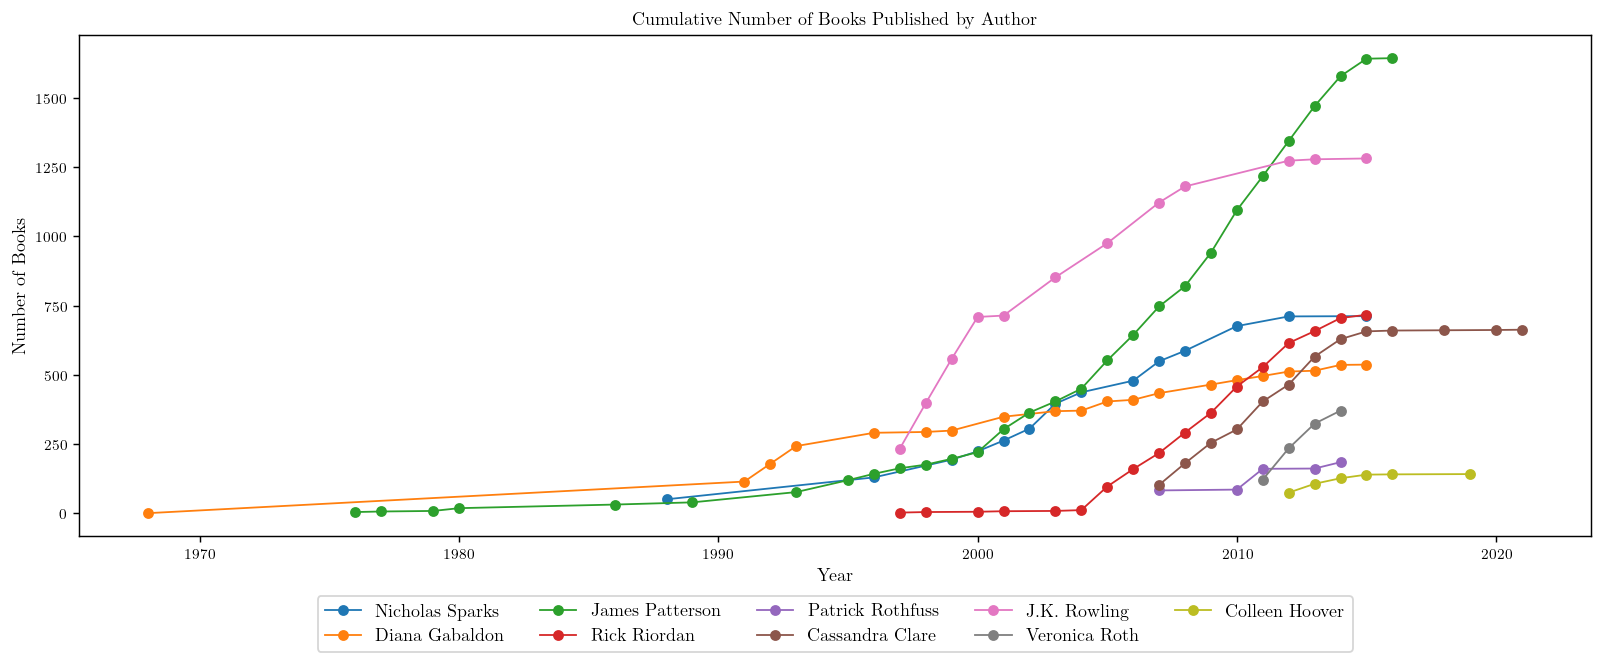

In [480]:
#Then we plot the line plot
plt.figure(figsize=(15,5), dpi= 130)
plt.title("Cumulative Number of Books Published by Author")
plt.xlabel("Year")
plt.ylabel("Number of Books")
for key, values in authors_cumulative_values.items():
    plt.plot([value[0] for value in values], [value[1] for value in values], label=key, marker="o", markersize=5, linewidth=1)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=5)




In [502]:
import importlib
importlib.reload(pm)
importlib.reload(dm)


<module 'modules.data_handling_module' from '/Users/miguelangel/Documents/Master/Algorithmic Methods of Data Science/Homeworks/ADM-HW2/modules/data_handling_module.py'>

----

### **[RQ7] Estimating probabilities is a core skill for a data scientist: show us your best!**
- Estimate the probability that a book has over 30% of the ratings above 4.

- Estimate the probability that an author publishes a new book within two years from its last work.

- In the file ``list.json``, you will find a peculiar list named **"The Worst Books of All Time."** Estimate the probability of a book being included in this list, knowing it has more than 700 pages.

- Are the events *X=’Being Included in The Worst Books of All Time list’* and *Y=’Having more than 700 pages’* independent? Explain how you have obtained your answer.

----



In [500]:
lighter_books["ratings_above_4"] = lighter_books['rating_dist'].apply(lambda x: dm.get_ratings_above_limit_ratio(x))

print(f"The probability that a book has over 30% of ratings above 4 is: {len(lighter_books[lighter_books['ratings_above_4']>0.3])/len(lighter_books)}")


The probability that a book has over 30% of ratings above 4 is: 0.9239221046040413


In [505]:
worst_books_list = dm.get_worst_books_list()
worst_books_list = [dictionary.get("book_id") for dictionary in worst_books_list]


In [506]:
worst_books_list


['41865',
 '1162543',
 '49041',
 '428263',
 '10818853',
 '6263078',
 '6076107',
 '3090465',
 '564449',
 '968',
 '4013201',
 '1812457',
 '747061',
 '2183067',
 '48625',
 '993455',
 '569357',
 '3975774',
 '19501',
 '7937462',
 '9742',
 '7455',
 '5107',
 '240469',
 '119322',
 '8714',
 '8752457',
 '11857408',
 '675626',
 '6411961',
 '7613',
 '8135213',
 '9416',
 '3268926',
 '96833',
 '252914',
 '13536860',
 '35220',
 '6867',
 '56495',
 '3636',
 '2657',
 '703847',
 '252917',
 '6487308',
 '13079982',
 '7624',
 '4900',
 '1656001',
 '10920',
 '32261',
 '6478256',
 '70401',
 '801178',
 '139253',
 '43763',
 '662',
 '5308',
 '18144590',
 '227443',
 '37781',
 '629',
 '81176',
 '37442',
 '227603',
 '30183',
 '33926',
 '186190',
 '7604',
 '667',
 '7354',
 '3754102',
 '4989',
 '234225',
 '3332986',
 '168668',
 '5470',
 '5191',
 '10210',
 '11125',
 '6538',
 '930',
 '95707',
 '5641414',
 '78411',
 '5899779',
 '256683',
 '33574273',
 '52529',
 '338798',
 '73968',
 '2956',
 '359770',
 '5129',
 '1035',
 '

In [501]:
lighter_books


,title,author_id,language,average_rating,rating_dist,ratings_count,text_reviews_count,original_publication_date,format,num_pages,series_name,series_position,description,ratings_above_4
id,,,,,,,,,,,,,,
2,Harry Potter and the Order of the Phoenix (Har...,1077326,eng,4.50,5:1674064|4:664833|3:231195|2:41699|1:16215|to...,2628006,44716,2003-06-21,Paperback,870.0,Harry Potter,5,There is a door at the end of a silent corrido...,0.889989
3,Harry Potter and the Sorcerer's Stone (Harry P...,1077326,eng,4.48,5:4801606|4:1681521|3:623286|2:145898|1:125040...,7377351,116930,1997-06-26,Hardcover,309.0,Harry Potter,1,Harry Potter's life is miserable. His parents ...,0.878788
4,Harry Potter and the Chamber of Secrets (Harry...,1077326,eng,4.43,5:1690166|4:781011|3:313727|2:54687|1:15453|to...,2855044,55286,1998-07-02,Hardcover,352.0,Harry Potter,2,The Dursleys were so mean and hideous that sum...,0.865548
5,Harry Potter and the Prisoner of Azkaban (Harr...,1077326,eng,4.57,5:1994597|4:696545|3:212678|2:28915|1:13959|to...,2946694,58023,1999-07-08,Mass Market Paperback,435.0,Harry Potter,3,"For twelve long years, the dread fortress of A...",0.913275
6,Harry Potter and the Goblet of Fire (Harry Pot...,1077326,eng,4.56,5:1808039|4:663849|3:193604|2:27759|1:12425|to...,2705676,48637,2000-07-08,Paperback,734.0,Harry Potter,4,Harry Potter is midway through his training as...,0.913593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25521011,Rumble Tumble,58971,ger,4.00,5:722|4:1324|3:602|2:54|1:8|total:2710,2710,169,1998-09-01,Paperback,227.0,Hap and Leonard,5,Hap arbeitet als Rausschmeißer in einem Nachtc...,0.754982
25521013,Julie eller Den nya Héloïse BOK I,7994,swe,3.08,5:7|4:11|3:16|2:13|1:4|total:51,51,0,1761-01-01,Hardcover,597.0,NaN,NaN,Rousseaus Den nya Héloïse är en av västerlande...,0.352941
25521014,A Frozen Heart,3510823,eng,3.85,5:556|4:518|3:443|2:128|1:38|total:1683,1683,299,2015-10-13,Kindle Edition,304.0,NaN,NaN,Told in alternating chapters from both Anna's ...,0.638146


----

### **[RQ8] Charts, statistical tests, and analysis methods are splendid tools to illustrate your data-driven decisions to check whether a hypothesis is correct.**

- Can you demonstrate that readers usually rate the longest books as the worst?

- Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?

- About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.

- It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit *lazy*. Confirm or reject this with a convenient statistical test or a predictive model.

- Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.

----


----

### **Bonus Points**

**1.**
- Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload ``authors.json`` dataset, and filter authors with at least 100 reviews. Do the same using Pandas and compare performance in terms of milliseconds.

- Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload books.json, and join them with ``authors.json`` based on author_id. How many books don’t have a match for the author?

**2.** Every book should have a field named description, and any author should have a field named description. Choose one of the two and perform a text-mining analysis:

- If you choose to text-mine ``books.json`` **’ descriptions**, try to find a way to group books in genres using whatever procedure you want, highlighting words that are triggers for these choices.

- If you choose to text-mine ``authors.json`` **’ about-field**, try to find a way to group authors in genres using whatever procedure you want, highlighting words that are triggers for these choices.

- If you feel comfortable and did **both** tasks, analyze the matching of the two procedures. You grouped books and authors in genres. Do these two procedures show correspondence?

----

----

## **Command Line Question (CLQ)**
Using the command line is a feature that Data Scientists must master. It is relevant since the operations there require less memory to use in comparison to other interfaces. It also uses less CPU processing time than other interfaces. In addition, it can be faster and more efficient and handle repetitive tasks quickly.

__Note:__ To answer the question in this section, you must strictly use command line tools. We will reject any other method of response. 

Looking through the files, you can find ``series.json``, which contains a list of book series. In each series's <ins>'works'</ins> field, you'll find a list of books that are part of that series. Report the title of the __top 5__ series with the <ins>highest total 'books_count'</ins> among all of their associated books using command line tools. 

1. Write a script to provide this report. Put your script in a shell script file with the appropriate extension, then run it from the command line. The file should be called commandline_original.[put_the_proper extension]

2. Try interacting with ChatGPT or any other LLM chatbot tool to implement a <ins>more robust</ins> script implementation. Your final script should be __at most three lines__. Put your script in a shell script file with the appropriate extension, then run it from the command line. The file should be called commandline_LLM.[put_the_proper_ extension]. Add in your homework how you employed the LLM chatbot tools, validate if it is correct, and explain how you check its correctness.
   
The expected result is as follows: 

|id|title|total_books_count|
|---|---|---|
|302380|Extraordinary Voyages|20138|
|94209|Alice's Adventures in Wonderland|14280|
|311348|Kolekcja Arcydzieł Literatury Światowe|13774|
|41459|Oz|11519|
|51138|Hercule Poirot|11305|  

----


To solve the Command Line Question we used two main command line packages to process data in the command line:

- **jq**: A command line JSON processor. jq is built around the concept of filters that work over a stream of JSON. Each filter takes an input and emits JSON to standard out. We consulted the following references to solve this problem: 

    - *Basics of jq*: [Guide to Linux jq Command for JSON Processing](https://www.baeldung.com/linux/jq-command-json) and [jq Tutorial](https://jqlang.github.io/jq/tutorial/).
    
    - *Sorting with jq*: [Sorting JSON by Value with jq](https://phpfog.com/sorting-json-by-value-with-jq/) and [Sort Descending by Multiple Keys in jq](https://stackoverflow.com/questions/35540294/sort-descending-by-multiple-keys-in-jq).

    - *Summing with jq*: [How do I sum the values in an array of maps in jq?](https://stackoverflow.com/questions/28484534/how-do-i-sum-the-values-in-an-array-of-maps-in-jq) and [How to convert a string to an integer in a JSON file using jq?](https://stackoverflow.com/questions/48887711/how-to-convert-a-string-to-an-integer-in-a-json-file-using-jq).

- **csview**: A package to visualize .csv files as tables (this was mainly used to print the Markdown Table). We consulted the following references to solve this problem:

    - *Printing jq data as table*: [Convert json to Markdown Table in bash](https://stackoverflow.com/questions/76036576/convert-json-to-markdown-table-in-bash).

In order to work with these packages it is necessary to install them first. Since we're working with a MacOS operating system we installed them via the ``brew`` command:

```bash
foo@bar:~$ brew install jq
```
```bash
foo@bar:~$ brew install csview
```

Before working our bash script we had to visualize the structure of the ``series.json`` in order to know how to manipulate it. To do this we printed the first line within the file using the following command:



In [508]:
#This bash command takes the first line of the series.json file and prints it. The head command is used to take the first line of the file and the -n 1 argument is used to take only the first line
!head -n 1 ./data/series.json


{"id": "40323", "title": "Dragonriders of Pern", "description": "Also known as:\n    * Drakenrijders van Pern\n    * Cavaleiros de Pern\n    * Zmajevi jaha\u010di Perna\n    * Drakeni z Pernu\n    \n    This series is for the original Pern Trilogy. Note that both in publication and chronological order the first two books of the <a href=\"http://www.goodreads.com/series/43987-pern-harper-hall\">Harper Hall Trilogy</a> come before The White Dragon.\n    \n    For the full series see:\n    <a href=\"http://www.goodreads.com/series/50060-pern-published-order\">Pern (Publication Order)</a>\n    <a href=\"http://www.goodreads.com/series/49339-pern-chronological-order\">Pern (Chronological Order)</a>\n    \n    Also consider that reader Trike says \"Dragonflight by Anne McCaffrey is a standalone. (It's actually a fix-up novel comprised of her two Pern novellas with additional material added.) The sequels were added later. Numbers 2 and 3, Dragonquest and The White Dragon were written later. A

As we can see, each line of our document is a JSON with the "id" and "title" of a series of books. It also contains the "works" key that contains an array of dictionaries of works, where each dictionary contains a "books_count" key that gives us the count for the books for each particular work.

In order to write our bash script we we consulted [How to Write a Bash Script](https://www.datacamp.com/tutorial/how-to-write-bash-script-tutorial?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720818&utm_adgroupid=157156374231&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=676136073296&utm_targetid=dsa-2218886984300&utm_loc_interest_ms=&utm_loc_physical_ms=1008736&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-eu_4-prc_5-na_6-na_7-le_8-pdsh-go_9-na_10-na_11-na&gclid=Cj0KCQjwtJKqBhCaARIsAN_yS_nhtiuDtGPAFaV6Jn5RCDl008Va7YOZBWOccjhWNrVcVkFXHFKOjucaAgqEEALw_wcB) and [How to Create a Shell Script in Linux](https://www.linuxjournal.com/content/how-create-shell-script-linux) and noticed that in order to get the desired output table we have to perform the following steps:

1. Extract the "books_count" key and get its total sum for each book series (converting it to number since it's a string).

2. Sort our file by the "total_books_count" we calculated before and select the top 5 series of books.

3. Output a table in Markdown format including the "id", "title", and "total_books_count" of the top 5 series of books.

We performed these steps using ``jq`` and ``csview`` and wrote the ``commandline_original.sh`` bash script to obtain our desired output. You can find this file in the ``scripts`` folder of this repository. If we run this script, we can get the following output:

In [509]:
#This command runs the commandline_original.sh script in our terminal. The ! at the beginning is used to run bash commands in jupyter notebook
!bash ./scripts/commandline_original.sh


|   id   |                  title                   | total_book_count |
|--------|------------------------------------------|------------------|
| 302380 | Extraordinary Voyages                    | 20138            |
| 94209  | Alice's Adventures in Wonderland         | 14280            |
| 311348 | Kolekcja Arcydzieł Literatury Światowej  | 13774            |
| 41459  | Oz                                       | 11519            |
| 51138  | Hercule Poirot                           | 11305            |


As we can see we obtained the desired table in Markdown format with the correct results. This was achieved with the power of ``jq`` in just 4 lines of code which is already pretty good. Nevertheless it is possible we're performing extra steps or using tools that can be ommited, this is why we tried to obtain a more *robust* version of this code by interacting with ChatGPT.

The prompt we used to ask ChatGPT to modify our code was the following:

>You're a Computer Scientist. I have a JSON lines file where each line contains a JSON with information about a book series. In particular, we're interested in the fields:
>
>- "id":  the id of the book series.
>- "title": the title of the book series.
>- "works": an array of dictionaries where each dictionary contains a "books_count" key that gives the number of books for a given work in string format.
>
>I wrote the following bash script:
>
>
>``` bash
>#!/bin/bash
>#Script that extracts the top 5 series from the series.json file regarding their total book count and displays them as a Markdown table
>#To be able to run this script, you need to install jq and csview
>
>#Here we define the input file. This absolute path is only valid for the original repository, change it accordingly if you use this script in your own repository
>input_file="./data/series.json"
>
>#Step 1: We sort the json file in reverse by the total book count using jq and extract the first 5 entries
>#The jq -s option reads the entire input stream into a large array and then applies the filter to it
>#The map function is used to extract the book count from each work and add them together after converting them to numbers
>#The sort_by function sorts the array by the total book count
>#In the end, we format the output to only contain the id, title and total book count of the series and extract the first 5 entries using map and slicing
>formatted_data=$(jq -s 'sort_by(.works | map(.books_count | tonumber) | add)|reverse| map({"id": .id, "title": .title, "total_book_count": .works | map(.books_count | tonumber) | add})|.[:5]' "$input_file")
>
># Step 2: We convert the data to csv format using jq adding a header row
>#The echo command is used to pipe the formatted data into jq
>#The jq -r option is used to output raw strings
>#The jq @csv function converts the data to csv format
>csv_data=$(echo "$formatted_data" | jq -r '["id", "title", "total_book_count"],(.[]|[.id, .title, .total_book_count]) | @csv')
>
># Step 3: We use csview to display the csv data as a Markdown table
>echo "$csv_data" | csview -s Markdown
>```
>
>where I calculate the total_books_count by summing all the "books_count" values of the items in the "works" array for each book series, and output a table in Markdown format with the "id", "title" and "total_books_count" of the top 5 book series with greatest value of total_books_count.
>
>Write a more robust version of this code with the constraint that your code must be at most 3 lines long.

And we obtained the following response:

>Certainly, you can simplify the script into a more concise form using a combination of jq and command chaining. Here's a more concise version in three lines:
>
>```bash
>jq -s 'map({id, title, total_book_count: (.works | map(.books_count | tonumber) | add)}) | sort_by(.total_book_count) | reverse | .[:5]' "$input_file" | jq -r '["id", "title", "total_book_count"], (.[] | [.id, .title, .total_book_count]) | @csv' | csview -s Markdown
>```
>
>This code performs the same steps as your original script, including sorting by total book count, formatting as CSV, and displaying as a Markdown table, all in just three lines.

First, we can see that this code is a one-liner and not 3 lines as ChatGPT mentioned but this is a typical error when answering. Nevertheless, we can see that ChatGPT effectively corrected our code since we were calculating two times the "total_book_count" column when we could've done it only once. The steps of this code are the following:

- ``jq -s``: This jq option reads the entire input stream into a single JSON array.

- ``(.works | map(.books_count | tonumber) | add)``: This chunk of code takes the "works" array for every book series, converts its "books_count" key to a numeric object and then sums them all, thus obtaining the "total_book_count" for every book series.
- ``map({id, title, total_book_count: (.works | map(.books_count | tonumber) | add)})``: This chunk of code maps the "id", "title", and "total_book_count" to a new json containing only these keys.

- ``| sort_by(.total_book_count) | reverse | .[:5]``: This chunk of code sorts the new JSON by the "total_book_count" in reverse order (descending order) and takes only the first 5 lines where this value is bigger.

- ``jq -r``: This jq option is used to process the JSON data and produce raw (non-JSON) output.

- ``["id", "title", "total_book_count"]``: This chunk of code creates a JSON array with the headers for the CSV table.

- ``(.[] | [.id, .title, .total_book_count])``: This chunk of code iterates over each object in the JSON array and extracts the fields for each header.

- ``| @csv' | csview -s Markdown``: This chunk of code converts the data into CSV format and then displays it as a Markdown table.

In principle this code should work since it is not that far a way from our own and does the same process by taking unnecessary steps. Let's test it:


In [510]:
#This command runs the commandline_LLM.sh script in our terminal. The ! at the beginning is used to run bash commands in jupyter notebook
!bash ./scripts/commandline_LLM.sh


|   id   |                  title                   | total_book_count |
|--------|------------------------------------------|------------------|
| 302380 | Extraordinary Voyages                    | 20138            |
| 94209  | Alice's Adventures in Wonderland         | 14280            |
| 311348 | Kolekcja Arcydzieł Literatury Światowej  | 13774            |
| 41459  | Oz                                       | 11519            |
| 51138  | Hercule Poirot                           | 11305            |


Perfect, we obtain the same output. It is important to notice that our code was already robust since we only used 4 lines to perform all the steps, nevertheless the LLM helped us correct it and take out extra steps to make it even more efficient. The process we followed to test its correctness was perform each chunk of code individually and observe its output to make sure every step is doing what is supposed to do. In this particular case there was not much to check since its very similar to our original code.

**N.B**: We didn't add screenshots of our terminal since we can run bash scripts on Jupyter and we think it is better since anyone can recreate the results just by running the bash cell or observing its already printed output.

----

## **AWS Question (AWSQ)**
AWS offers access to many cloud-based tools and services that simplify data processing, storage, and analysis. Thanks to AWS's scalable and affordable solutions, data scientists can work effectively with large datasets and carry out advanced analytics. A data scientist must, therefore, perform the essential task of learning how to use AWS. To complete a straightforward data analysis task in this question, you must set up an environment on Amazon Web Services. 

In this question, you are asked to provide the most commonly used tags for book lists. Going through the ``list.json`` file, you'll notice that each list has a list of tags attached, and we want to see what are the <ins>most popular tags</ins> across all of the lists. Please report the __top 5__ most frequently used tags and the number of times they appear in the lists.

You have to follow the following (recommended) steps:  
- Download the *list.json* file to your local system. 

- Write a Python script that generates the report and the system's time to generate it.

- Set up an EC2 instance on your AWS account and upload the list.json file together with your script to the instance

- Compare the running times of your script on your local system and the EC2 instances.

__Important note__: Please run the __same script__ on both your local system and your EC2 instance to compare the results. e.g., keep the parameters the same if you are processing the data by loading it partially and aggregating the results. Comment about the differences you find.

Please provide a report as follows: 
- The information about the config of the EC2 instance 

- The command used to connect to the EC2 

- The commands used to upload the files and run the script on the EC2 instance through your local system 

- A table containing the most popular tags and their number of usage

- A table containing the running time of the script on your local system and EC2 instance
  
The following is the expected outcome for the most popular tags:
|tag|#usage|
|---|---|
|romance|6001|
|fiction|5291|
|young-adult|5016|
|fantasy|3666|
|science-fiction|2779|

----

In [6]:
!jq -s '.[0].tags' ./data/list.json


[
  "abominable",
  "abomination",
  "awful",
  "bad",
  "disgusting",
  "dislike",
  "disliked",
  "earliest-list",
  "hated",
  "horrendous",
  "loathed",
  "resented",
  "worst"
]


In [2]:
%run ./scripts/aws_question.py


| tag | #usage |
| --- | --- |
| romance | 6001 |
| fiction | 5291 |
| young-adult | 5016 |
| fantasy | 3666 |
| science-fiction | 2779 |
6.486752033233643 seconds


----

## **Algorithmic Question (AQ)**
Assume you are working as a librarian at a public library in Rome. Some new books have arrived, and you are in charge of putting them on a shelf. Your supervisor will give you some instructions, and you will follow his. Each book has a unique ID, and your boss's instructions can be of the following types: 

- **L N** - place the book with ID = N on the shelf to the left of the leftmost existing book

- **R N** - place the book with ID = N on the shelf to the right of the rightmost existing book

- **? N** - Calculate the minimum number of books you must pop from the left or right to have the book with ID = N as the leftmost or rightmost book on the shelf.
  
You must follow your boss's instructions and report the answers to type 3 instructions to him. He guarantees that if he has a type 3 instruction for a book with a specific ID, the book has already been placed on the shelf. 

Remember that once you've answered a type 3 instruction, the order of the books <ins>does not change</ins>. 

**Input:**

The first line contains a single number, n, representing the number of your boss's instructions. The ith instruction the boss gives can be found at each of the following n lines. 

**Output:**

Print your boss's type 3 instructions in the order they appear in the input. 

1. Implement a code to answer the problem above. 

2. Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation). Do you believe this is correct? How can you double-check it? Elaborate about your answer.

3. Is the algorithm proposed in (1.) the __optimal__ one to produce the required output? If not, can you suggest a <ins>better algorithm</ins> to perform the same task?

----

In [1]:
%run ./scripts/algorithmic_question.py


KeyboardInterrupt: Interrupted by user